# Mod 5 Project - Bank Marketing Classifier

Student details:
* Student name: **Ryan Beck** 
* Student pace: **part time** 
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:

## Project Overview: 

This project is designed to explore machine learning models and methods for the task of classification. We've been tasked with finding a dataset with labeled data with at least 40,000 rows of data and 20 columns. We will generally follow the **OSEMN** process for a data science project, which includes:
* **O**btaining the data
* **S**crubing (or cleaning) the data
* **E**xploring and visualizing the data
* **M**odeling 
* I**N**terpreting the results

**Project goal**: The data we will be using (more below) is a bank marketing data set. The goal for our project is to develop as model that predicts the success of a bank marketing campaign based on the features we have in out data. This model should therefore help us be better able to identify potential customers and refine our the focus of future campaigns. 

# Import Libraries and Data

## Libraries

In [1]:
# Import the necessary functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

from itertools import combinations

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

## Dataset - Bank Marketing Data Set

### Abstract: 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. **The classification goal** is to predict if the client will subscribe a term deposit (variable y).

### Citation:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt
                
Link to data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Input variables:

_**Bank client data:**_
1. **age**: (numeric)
2. **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')

_**Related with the last contact of the current campaign:**_
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and **should be discarded** if the intention is to have a realistic predictive model.

_**Other attributes:**_
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

_**Social and economic context attributes:**_
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

_**Output variable (desired target):**_
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

### Variable Notes: 

* There are a lot of categorical variables in this data:
    * we will need to deal with those by creating dummy variables for them
    * this will increase the dimensionality of our models significantly, so we will need to explore methods to reduce that where possible
* There are many "unknown" and other placeholder values. We will deal with those on a variable by variable basis
* **duration** is potentially disruptive for our model for the reasons stated in the notes about it we can go ahead and drop that now

### Importing data: 

Let's import our data for the first time and start get and idea of how it looks

In [2]:
# import data and specifiy the separator as ';', show the first 5 rows
df = pd.read_csv('bank-additional-full.csv', sep=';')
# show all the columns in the dataset 
pd.set_option('display.max_columns', None)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [3]:
# check the shape of the data 
df.shape

(41188, 21)

In [4]:
# check the data types and number of entries for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Initial Data Notes: 
* There are over 41k data entries and 21 variables, including the target variable 'y'
* It appears that there are no missing values, but we already know there are **many placeholder values**

Let's take a look at the descriptive statistics for our continuous variables

In [5]:
# show the central tendencies for each continuous variable
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

**Notes:** 
* 'duration' has a lot of variance, but we already know we'll be dropping that variable
* the mean and median of 'campaign' are very close, but the max value is much greater
* the placeholder '999' has significant influence over 'pdays'
* most other variables appear fairly stable and normally distributed. We'll confirm in our exploratory data analysis

# Clean and Prepare Data

In this section we will: 
1. Check for and deal with missing values
2. Inspect and learn more about the values in each variable
3. Inspect placeholder values and determine whether we want to:
    * impute values
    * drop entries or variables
    * leave them alone

## Missing Values

Although our previous inspection of the data appeared to have no values missing it is still a good step to confirm 

In [6]:
# check for any na values in the dataset
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Looks like we're good to go. Let's move forward with inspecting each variable more closely

## Value Counts

To better appreciate and more easily analyze our different variables we can first separate them into categorical and continuous groups

In [7]:
# create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print('----' * 8)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 11 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
--------------------------------
There are 10 continuous variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# check the number of unique values and the percent each value represents
# for each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64 

Unique values for marital: 4
 married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64 

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64 

Unique values for default: 3
 no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64 

Unique values for housing: 3
 yes        52.38
no         45.21
unknown     2.40
Name: housing, dtype: float64 

Unique valu

### Variable Value Notes: 
* **job:** There are 12 unique values for job with good distribution among them
    * Less than 1% of values are "unknown" -
    * With such a small number of unknowns and a relatively large number of unique values this does not seem like it will have a major influence on our model so for now we **can leave it alone** and revisit if it appears so later
* **marital:** There are three unique values for this variable with a distribution that seems representative of society
    * There are less than .2% of values shown as "unknown", but differently than before with only 3 unique variables for this data we can likely safely **impute values** by applying the known distribution to the unknown values
    * This will eliminate one unnecessary variable later on when we code dummies
* **education:** Education has 8 unique values with 4.2% unknown
    * With just under 1 in 20 values unknown we should consider **imputing values** for this variable similar to the 'marital' variable
* **default:** This is a binary yes/no variable, but also includes just over 20% "unknown"
    * This would be a large value to impute or drop.
    * With a very small value for "yes" we could likely safely code all "unknowns" as "no"
    * But, this is also interesting considering the business problem - it would be interesting to know if lack of knowledge of a default actually positively or negatively contributes to a successful marketing call
    * We will **leave "unknown" in place** for now
* **housing:** This is also a binary yes/no variable, but with a much smaller, 2.4%, amount of unknowns
    * For this variable we can likely safely **impute** again by applying the known distribution of yes/no
* **loan:** Another binary yes/no variable with the same % of unknowns
    * We can treat it similarly as the housing variable and **impute values**
    * With the same amount of unknowns it would be interesting to see if they are the same entries, and if they are missing more data should perhaps be dropped altogether
* **contact:** This variable is interestingly binary as well, between "cellular" and "telephone", we'll have to pay attention to how it is coded when we transform to dummies
* **month:** It appears this campaign was only for 10 months and heavily focused on the spring and early summer
* **day_of_week:** Calls were only made during the work week and seem very evenly distributed
    * Given the even distribution it will be very interesting to see if one day of the week was more fruitful that others
* **poutcome:** It appears that most people that had been contacted were not part of a previous campaign
    * For those that were previously contacted it will be very interesting to see if it has an influence on future success - especially those that were successfully reached previously
* **y:** Our target variable. It is good that we have no missing values here! Also it is good that we have a fairly significant positive rate with 11.27%.

**Continuous variables:** We've already previously seen the descriptive statistics of our continuous variables above and with continue to explore them in our EDA. 
* We do however know that we need to deal with the "999" placeholder for "pdays" and drop "duration"

## Dealing with "duration", "unknown", and "999" 

### Duration: 
As stated in the notes for the dataset, the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set 

In [9]:
# crete a new dataframe for cleaning and drop the 'duration' column
data = df.drop(columns=['duration'], axis=1)
data.head(2)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no

### "Unknown"
In the above section we decided we would: 
* Impute values for: 
    1. marital
    2. education
    3. housing
    4. loan
    
We can make a quick function to help impute values based on the weights of the currently known values

In [10]:
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable 

#### Marital Unknown

In [11]:
# get a unique list values and drop 'unknown'
values = list(set(df.marital.values))
values.remove('unknown')
values

['single', 'married', 'divorced']

In [12]:
# determine the weight of each value in the category 
prob = data[data['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6064026466867763, 0.2814050793032986, 0.11219227400992507]

In [13]:
# check the current distribution of values
data.marital.value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [14]:
# impute the values for 'unknown'
data.marital = data.marital.map(lambda x: impute_values(x, values, prob))

In [15]:
# check the new distribution of values
data.marital.value_counts(normalize=True)

married     0.605832
single      0.282072
divorced    0.112096
Name: marital, dtype: float64

#### Education Unknown

In [16]:
# get a unique list values and drop 'unknown'
values = list(set(data.education.values))
values.remove('unknown')
values

['high.school',
 'basic.4y',
 'university.degree',
 'professional.course',
 'basic.9y',
 'illiterate',
 'basic.6y']

In [17]:
# determine the weight of each value in the category 
prob = data[data['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.3083863446283296,
 0.2411485921382771,
 0.15320475454292015,
 0.13287883011886356,
 0.10583673365942672,
 0.05808855209468535,
 0.00045619281749752894]

In [18]:
# check the current distribution of values
data.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [19]:
# impute the values for 'unknown'
data.education = data.education.map(lambda x: impute_values(x, values, prob))

In [20]:
# check the new distribution of values
data.education.value_counts(normalize=True)

university.degree      0.302224
high.school            0.243542
basic.9y               0.150918
professional.course    0.132733
basic.4y               0.112096
basic.6y               0.055647
illiterate             0.002841
Name: education, dtype: float64

#### Housing Unknown

In [21]:
# get a unique list values and drop 'unknown'
values = list(set(data.housing.values))
values.remove('unknown')
values

['no', 'yes']

In [22]:
# determine the weight of each value in the category 
prob = data[data['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [23]:
# check the current distribution of values
data.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [24]:
# impute the values for 'unknown'
data.housing = data.housing.map(lambda x: impute_values(x, values, prob))

In [25]:
# check the new distribution of values
data.housing.value_counts(normalize=True)

yes    0.535714
no     0.464286
Name: housing, dtype: float64

#### Loan Unknown

In [26]:
# get a unique list values and drop 'unknown'
values = list(set(data.loan.values))
values.remove('unknown')
values

['no', 'yes']

In [27]:
# determine the weight of each value in the category 
prob = data[data['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [28]:
# check the current distribution of values
data.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [29]:
# impute the values for 'unknown'
data.loan = data.loan.map(lambda x: impute_values(x, values, prob))

In [30]:
# check the new distribution of values
data.loan.value_counts(normalize=True)

no     0.844396
yes    0.155604
Name: loan, dtype: float64

### "999"

As we know, the placeholder "999" value for 'pdays', which is the number of days since the customer was previously contacted is very prevalent. Let's take a look at how much before we decide what to do with it. 

In [31]:
# check the the number of time '999' occurs relative to other values
data.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
26     0.000024
20     0.000024
25     0.000024
27     0.000024
Name: pdays, dtype: float64

**Notes:** 
* The placeholder represents over 96% of values
* 0 is also a value, which may mean that a customer had previously been called on the same day

For now we can create a **new binary variable** that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted this may not turn out to be a strong predictor. If it turns out that it is an important feature we can revisit. 

In [32]:
# create new column that indidates where or not a customer has been contacted
# since 999 means "not contacted" we can use that as an identifier

data['p_contacted'] = [0 if x == 999 else 1 for x in data.pdays] 
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  p_contacted  
0          93.994          -36.4      4.857       5191.0  no            0  
1          93.994          -36.4      4.857       5191.0  no            0  
2          93.994          -36.4      4.857       5191.0  no            0  
3          93.994          -36.4      4.857       5191.0  no            0  
4          93.994          -36.4      4.857       5191.0  no            0

Let's check the value counts of our new variable to see if the distribution remains the same. We should see ~96% 0's

In [33]:
# check value counts for p_contacted
data.p_contacted.value_counts(normalize=True)

0    0.963217
1    0.036783
Name: p_contacted, dtype: float64

This looks right! Now we can drop the original 'pdays' column for now.

In [34]:
# drop the 'pdays' column
data.drop(columns=['pdays'], inplace=True)
data.head(2)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  campaign  previous     poutcome  emp.var.rate  \
0   may         mon         1         0  nonexistent           1.1   
1   may         mon         1         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  p_contacted  
0          93.994          -36.4      4.857       5191.0  no            0  
1          93.994          -36.4      4.857       5191.0  no            0

This wraps up our cleaning for now. Now let's see how our data looks before we start transforming it for our models. 

# Exploratory Data Analysis and Feature Transformation

In this section we will take a deeper look at all of our variables to see if we can learn more about them before transforming them for modeling. We will look at:
1. Counts of categorical variables
2. Distributions of continuous variables
3. Potential correlations
4. Class imbalance and transformations

## Categorical Variables

In this section we will primarily look at the counts of our different categorical variables to get a feel for how they are distributed. First, we'll separate them out into their own dataframe to work with.

In [35]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = data[cat_vars]
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

This looks good, except we've create a new categorical variable since we last looked at all our categorical variables, 'p_contacted'. We can add that to this dataframe now. 

Also, we should note that our target variable is in this group. That's ok for now, we want to have an idea of how that looks too. 

In [36]:
# add the 'p_contacted' variable to cat_data
cat_data = cat_data.join(data.p_contacted)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  p_contacted  
0         mon  nonexistent  no            0  
1         mon  nonexistent  no            0  
2         mon  nonexistent  no            0  
3         mon  nonexistent  no            0  
4         mon  nonexistent  no            0

### Plot category counts and relationship with 'y'

We'll plot the overall counts of each categorical variable value and look at the rate of "yeses" we got for each to start looking for possible relationships for a successful marketing campaign. 

It will help to first turn our target variable 'y' into a binary dummy so that we can get averages

In [37]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  y  p_contacted  
0         mon  nonexistent  0            0  
1         mon  nonexistent  0            0  
2         mon  nonexistent  0            0  
3         mon  nonexistent  0            0  
4         mon  nonexistent  0            0

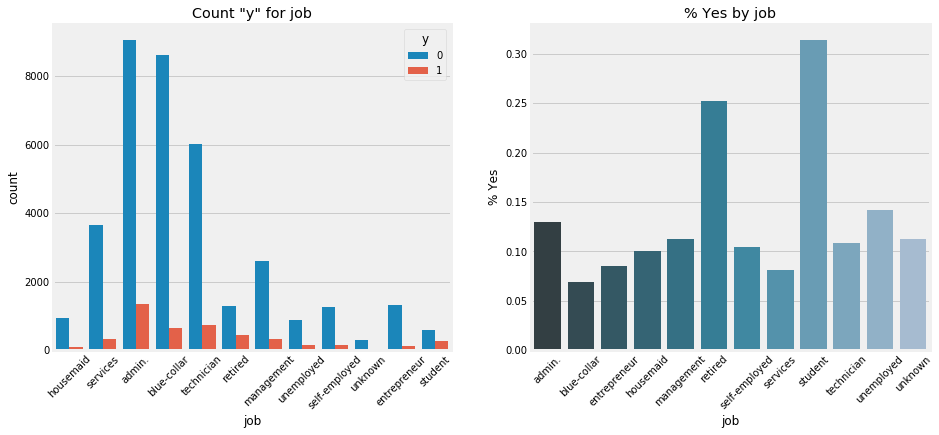

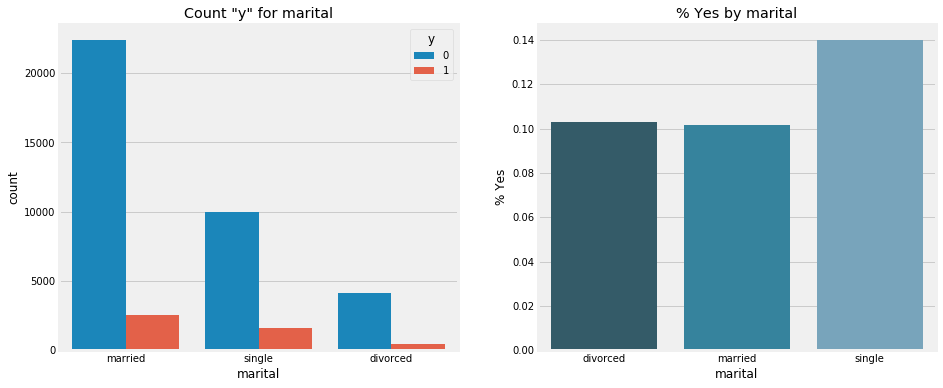

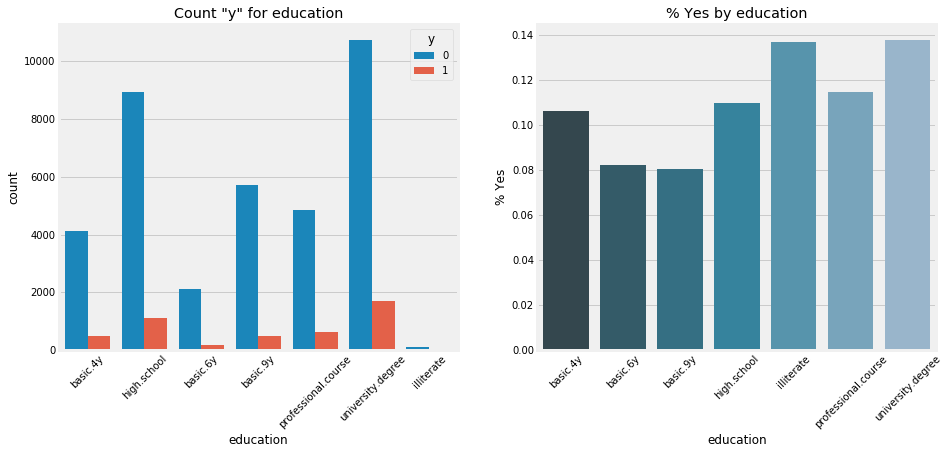

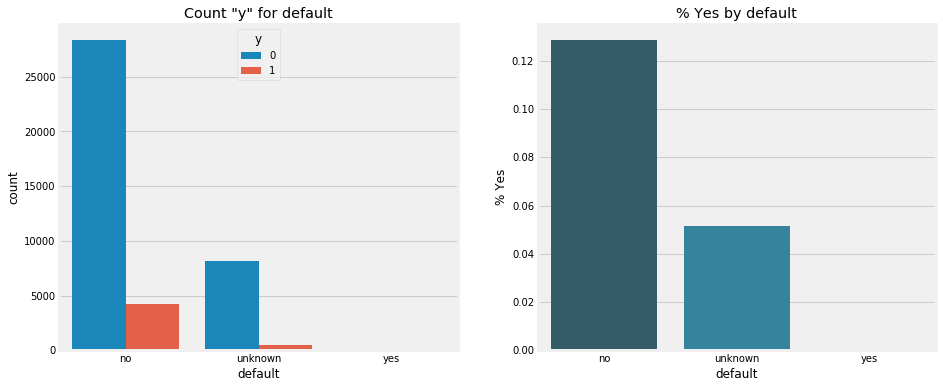

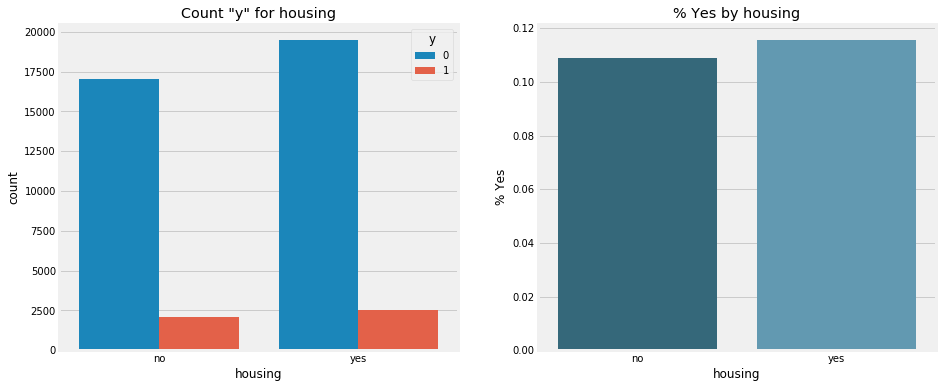

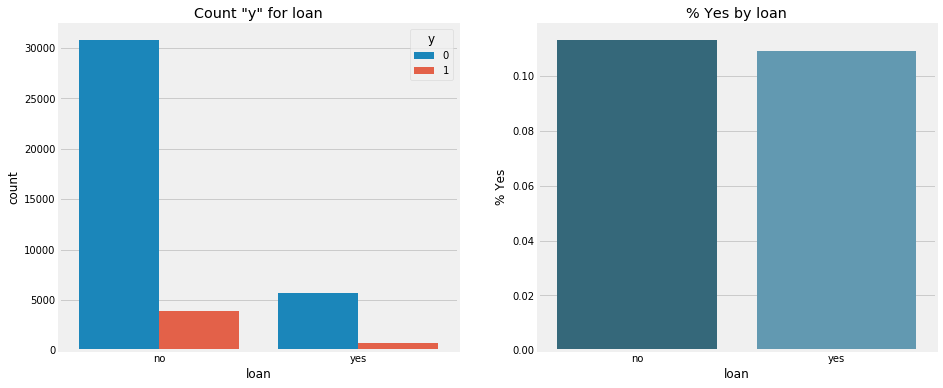

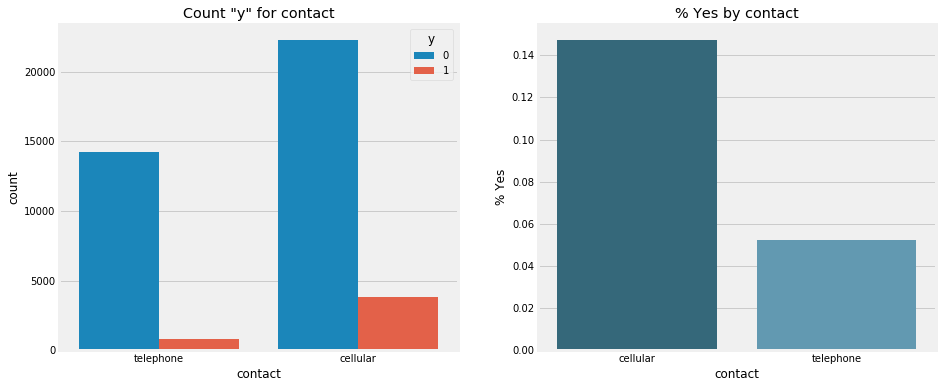

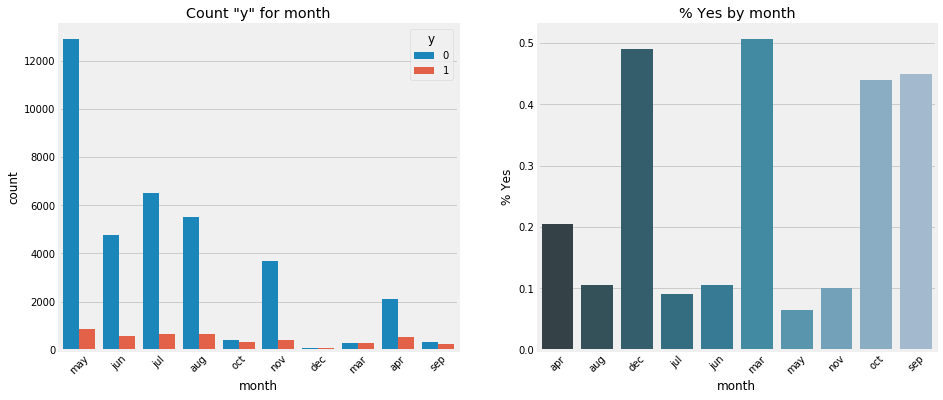

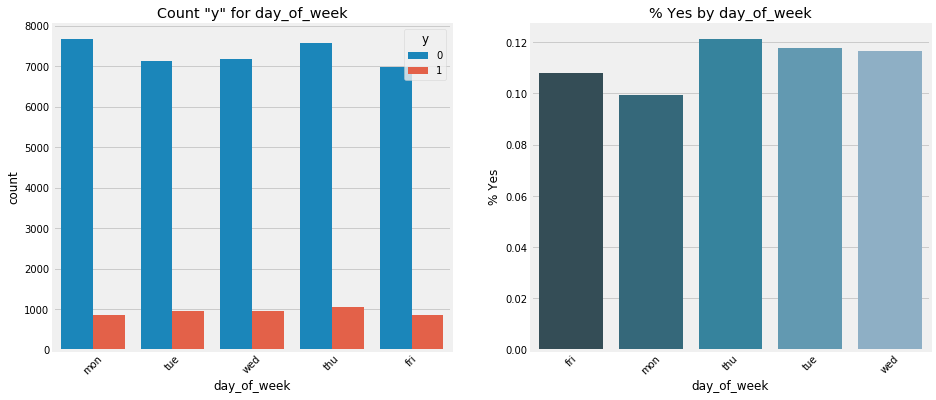

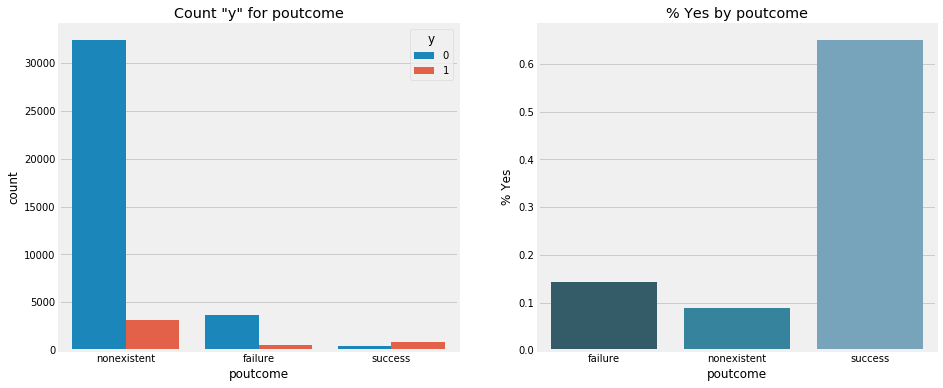

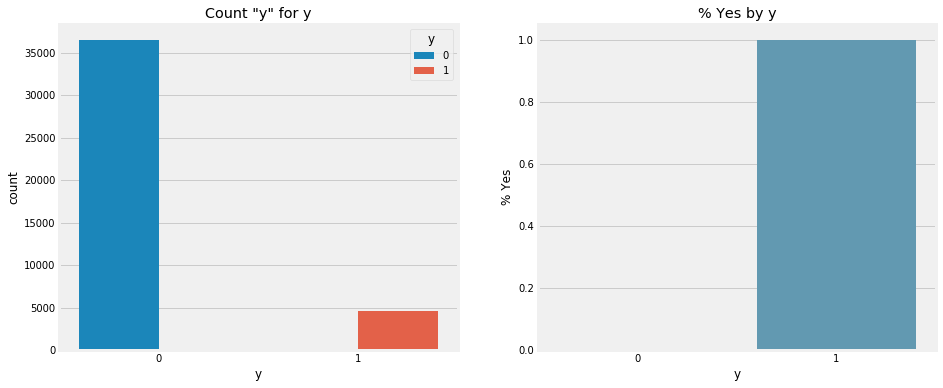

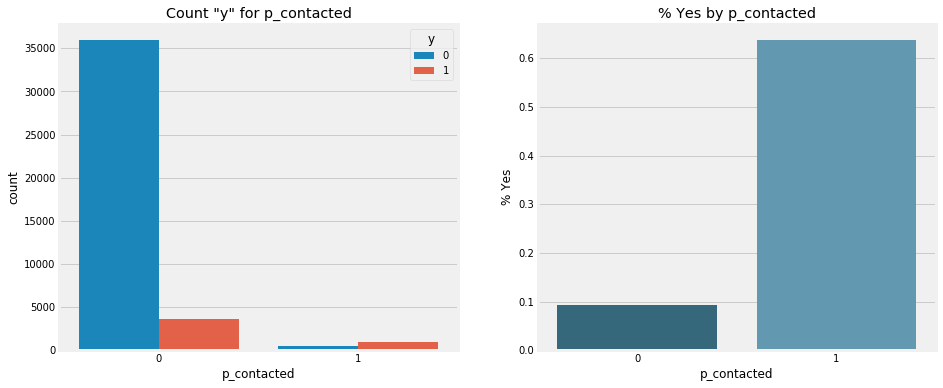

In [38]:
# iterate through the categorical variables and plot the value counts and 
# percentage 'y' for each value
for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.show()

### Categorical variable observations

* **Job:** Overall job does not appear to be much of a predictor of success for the marketing campaign. Although there does appear to be greater success among students, retirees and admin professionals, they represent relatively small numbers within the overall campaign. It could be a sigh that this particular product was well suited to them. 
* **Marital:** Success among married and divorced people appear roughly the same, but there is much **more success** among single people. That may turn out to be a good predictor.
* **Education:** Success seems a little more evenly distributed here. It appears high among the illiterate, but they represent a very number of the total count. University educated individuals seem to respond well, and they are the largest group in the data. This may be a good predictor. 
* **Default:** Those that have not defaulted on a loan are much more likely to successfully become customers than our unknowns, and at a slightly higher average (\~12.5%) than the overall average (\~10%)  
* **Housing:** Whether or not someone has a home loan does not appear to have much of a relationship with the success of the campaign.
* **Loan:** Personal loans also do not appear to be much of a predictor
* **Contact:** Customers contacted via cellular phone appear to be much more likely to be successful prospects, this is interesting. Cellular customers were also contact more, but not with too much imbalance. 
* **Month:** Month does not appear to have a very significant effect. There are months with very high success rates, but those are often months that also have very low relative counts. It would be interesting to know if those are follow-ups in the later months, or return customers or warm leads in the early months. Overall it appears that the majority of the campaign occured between May and August
* **Day of week:** Day of week does not seem to have a large amount of significance, but the middle days do appear to be slightly more successful than Monday and Friday. 
* **Poutcome:** The outcome of the previous marketing campaign does appear to have an effect. Even though it is a very small number, prior success seems to suggest later success. And, those that were contacted and failed also are more successful, indicating that returning to previous targets may have value. 
* **Pcontacted:** Those that had been previously contacted in the campaign ended up signing up at a rate of 60%, that is very high, even though the overall count of these individuals is small. This variable is tough to interpret because intuitively it makes sense that customers that have been contacted before are more likely to have signed up than those called for the first time simply because they have been given more opportunities to say "yes". There are a number of reasons these people may have been called more that once that do not suggest a greater amount of calls necessarily results in greater customer conversion, but it also suggest that customers that are leaning yes may be more likely converted with persistence. 

Variables to keep an eye on are: **Pcontacted, job_student, job_retired, marital_single, contact_cellular**

Variables that may not be as helpful: Month, Day of week, home, loan, education

Perhaps one of the most important observations we can see from above is that our **target variable, y** is **imbalanced**. Only \~11% of the rows observed here result in a positive customer conversion. We will have to take that into account as we are doing our final feature transformations when we begin modeling.  

## Continuous Variables

Now that we've given our categorical variables a good luck, let's dig deeper into our continuous variables and see if we can gain more early insights.

Let's remember that we began with a different list of continuous variables than we have now, so let's check and see what we need to update. 

In [39]:
# check the values we have for continuous variables
cont_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

It looks like we still have 'duration' and 'pdays', which we've either removed or changed into a categorical variable. Let's adjust our list accordingly.

In [40]:
#drop 'duration' and 'pdays' from the list 
cont_vars.remove('duration')
cont_vars.remove('pdays')
cont_vars

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Ok, now that we've fixed out list we let's create a dataframe to work with.

In [41]:
# create a dataframe of continuous variables using our list
cont_data = data[cont_vars]
cont_data.head(2)

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  
0      4.857       5191.0  
1      4.857       5191.0

Let's create a quick function to help us iterate through plotting the distribution of these variables. 

In [42]:
# create a function that iterates through the dataframe and plots histograms for our continuous variables 
def plot_cont(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')
        

### Plot continuous variables

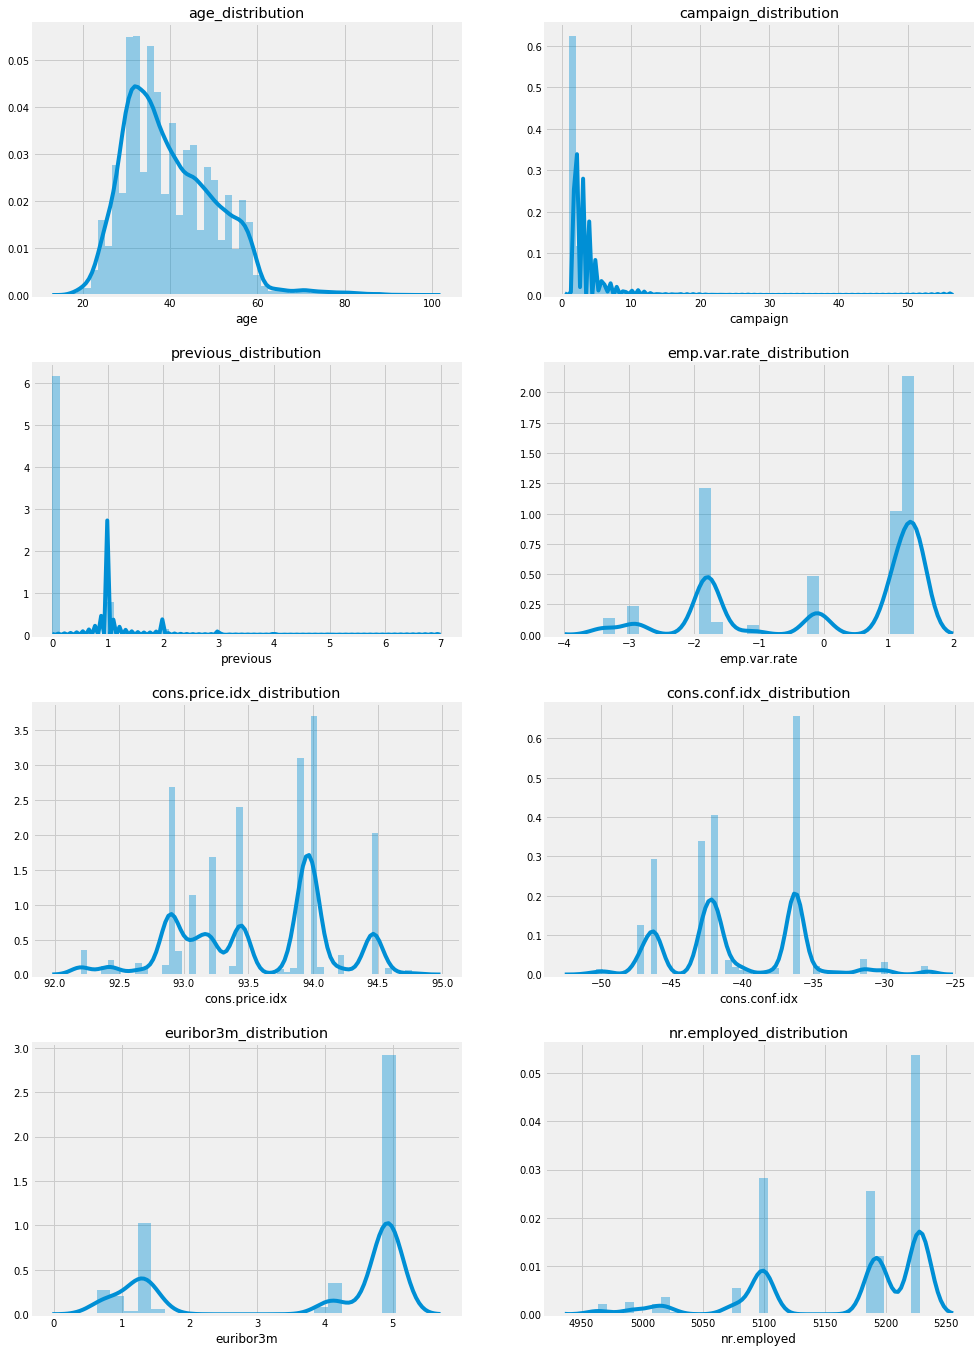

In [43]:
# plot histograms for the continuus variables
plot_cont(cont_data)

### Continuous variable distribution observations

* Most of the data is not normally distributed, with **Age** being the closest variable that is
* The variables that have to do with number of times contacted (**campaign**), or previously contacted (**previous**), are all very skewed to the right due to the fact that most people had not previously been contacted or were not contacted a large number of times
* Other values like **consumer price index** and **consumer confidence index** have similar shapes and which suggests there might be some sort of correlation. Similar for **employee variation rate**, **number employed** and the **euribor 3 month rate**.

We've seen one representation of outliers here, let's see how they look with a box plot

### Continuous box plots

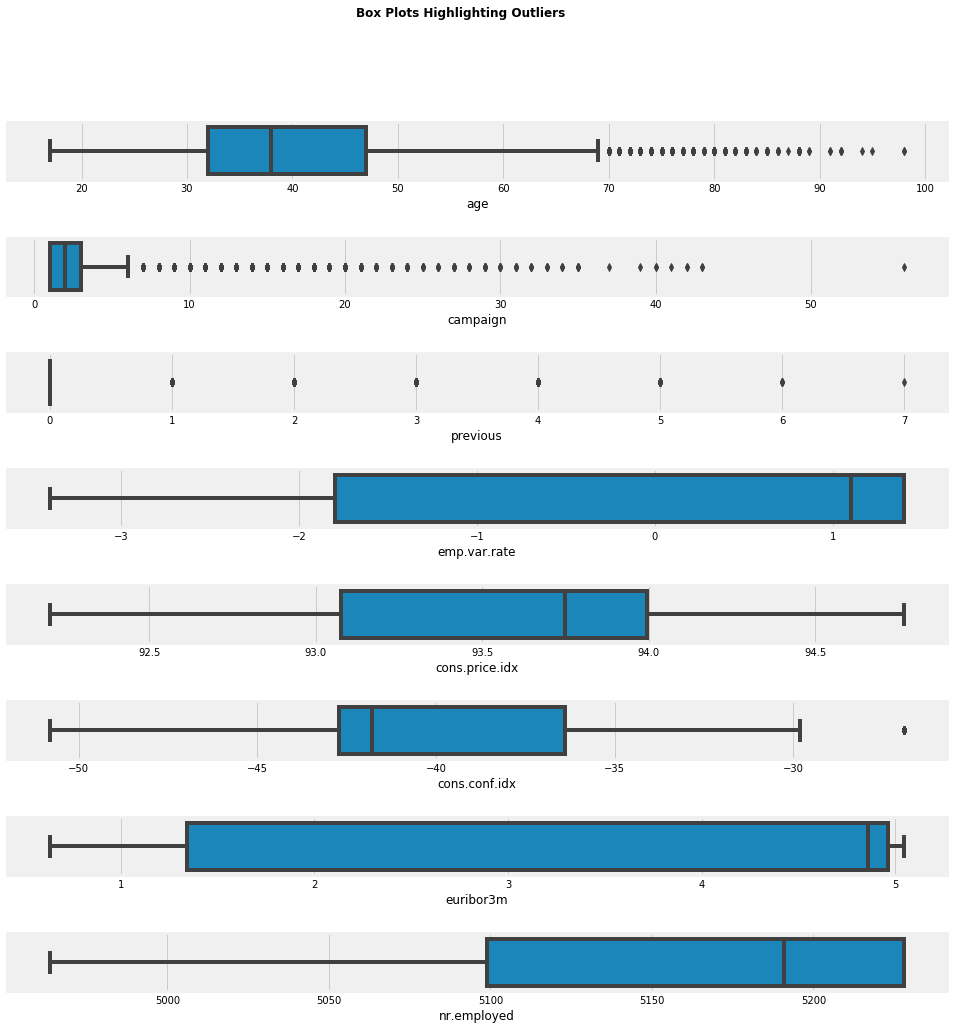

In [44]:
# create a box plot for each continuous variable
nrows = len(cont_vars)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(cont_vars):
    sns.boxplot(cont_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

#### Observations: 
* Similar to observations above, outliers for **age** begin around 70
* **Campaign** and **previous** are tightly clustered around 0 and lower numbers, almost to the point of binning them our creating a categorical similar to what we did with p_contacted
* Our economic variables all seem to have few outliers, which is not surprising given that many of them are indexes and likely designed to stay within a certain range. These may be more reliable predictors

### Checking for correlations and multicollinearity

We want to make sure that there are not too many highly correlated values in our data so we can assume that one variable can change while others remain there same. Let's take a look at our data to see what relationships we can find, as well and also start to take a look to see if any of these variables have a relationship with 'y'.

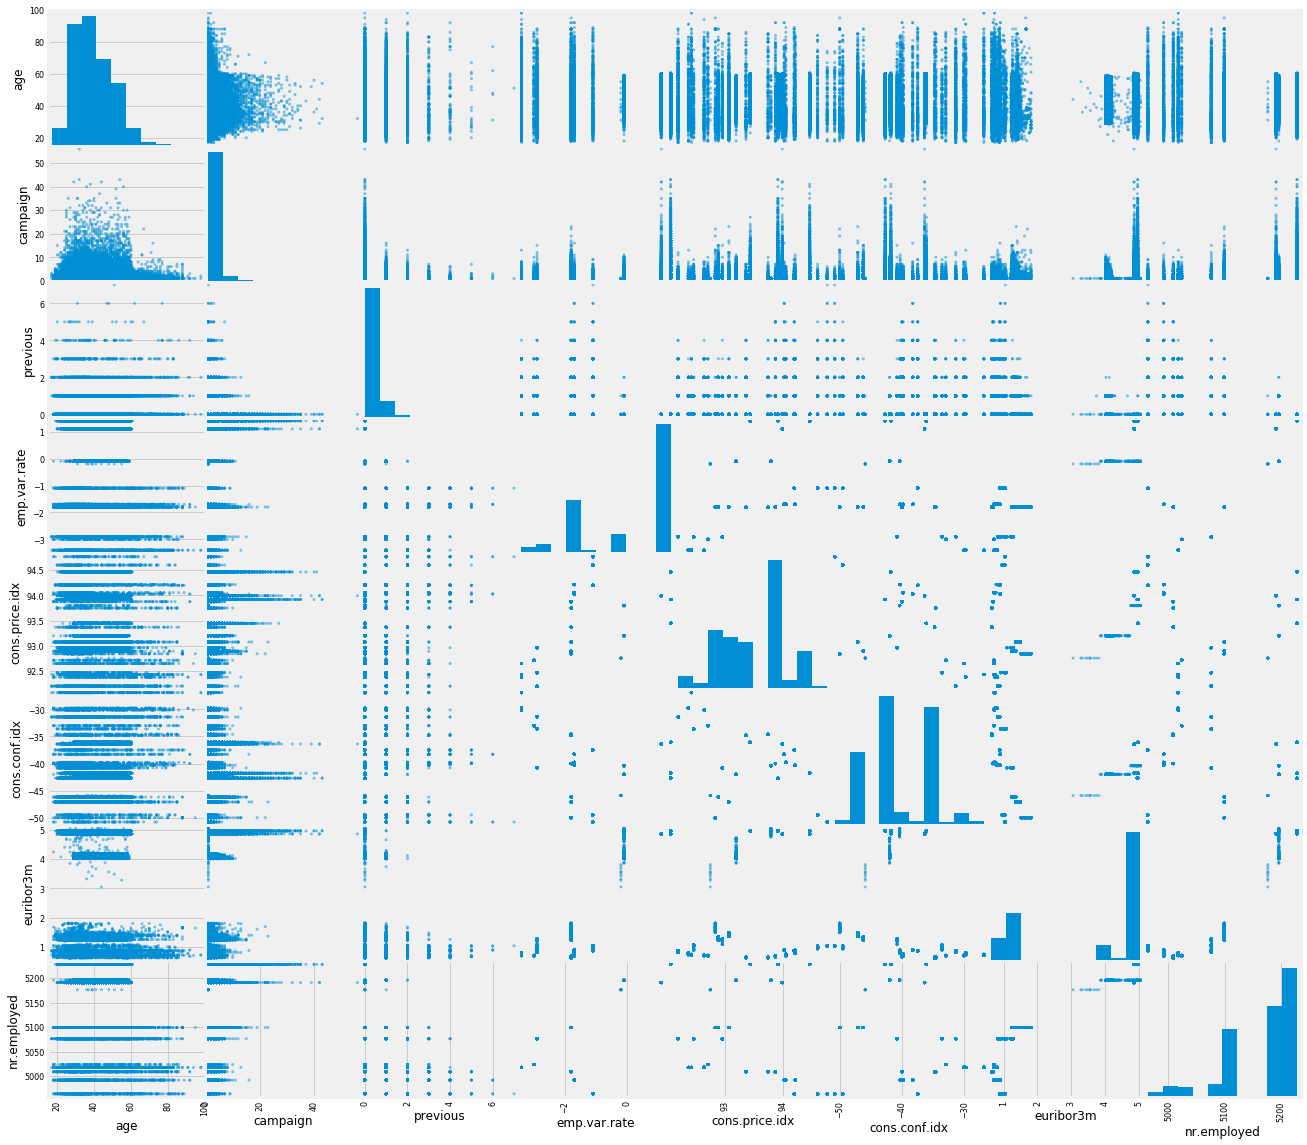

In [45]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(cont_data, figsize=(20,20));

**Observations:** Among the plots above there do not seem to be any liner relationships, but there there may be some very highly correlated pieces of data based on the plots that show little variation. Remembering that there are over 40,000 points of data in this dataset, any of the plots that have large areas of blank space may suggest a very tight cluster and potential correlation. 

#### Age Scatter Plots 
Age seems to have the largest number of unique values, so to explore more let's make more scatter plots of that variable with others, and see if there is a relationship with 'y'.

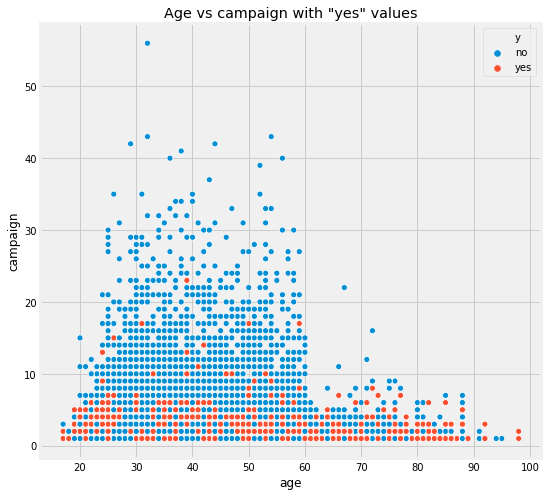

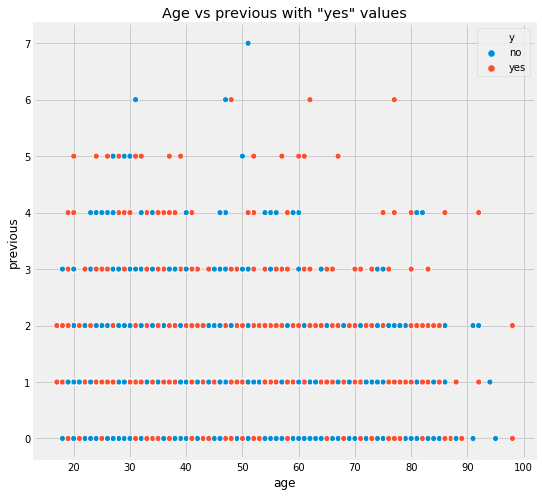

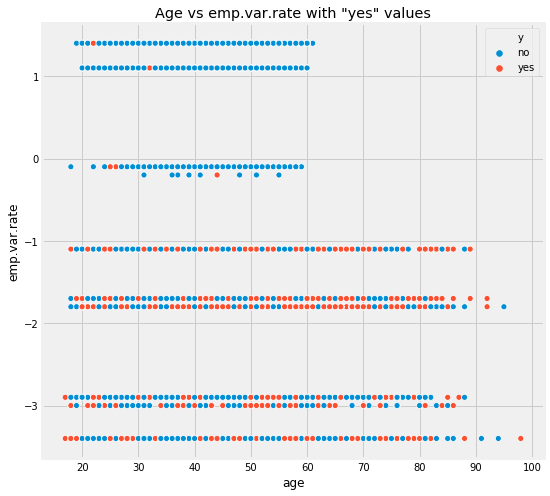

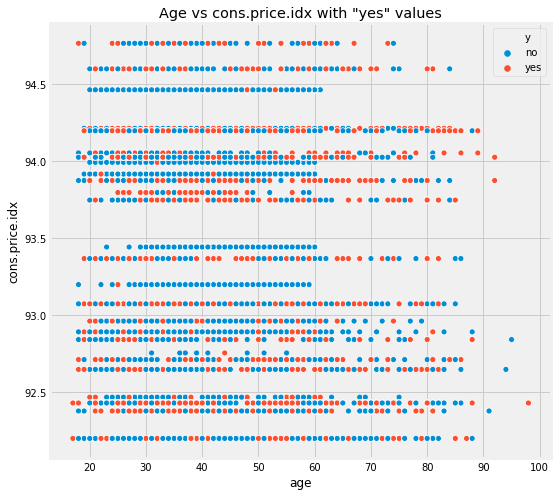

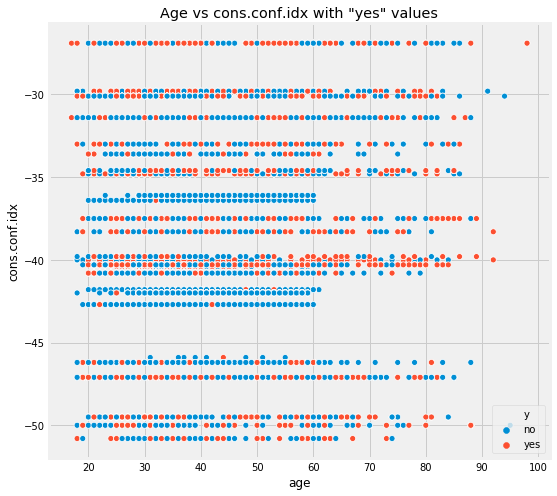

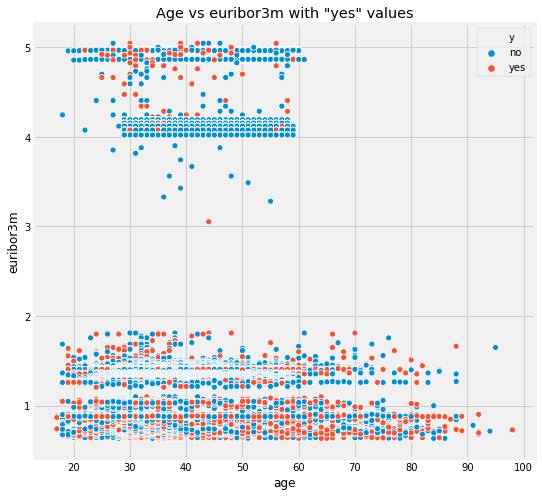

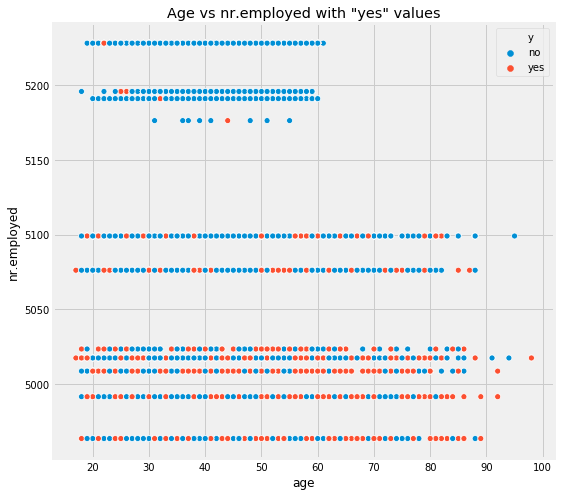

In [46]:
cont_vars = list(cont_data.columns.values)
cont_vars.remove('age')

for v in cont_vars:
    fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=data.age, y=data[v], hue='y', data=data)
    plt.title(f'Age vs {v} with "yes" values')
    plt.show()

**Observations:** Most of these plots don't appear to suggest a clear relationships with 'y'. There does appear to be some relationship with lower values of **contacted**, middle values of **emp.var.rate** and lower values of **nr.employed**. We will need to scale a lot of this data later, and it may be interesting to see if it is easier to plot some of these relationships then.  

#### Correlation Heatmaps

As mentioned above, we want to check for highly correlated values and consider removing them from our data for modeling. One way we can check if by creating correlation heatmaps and checking for values above **.7 to .8**

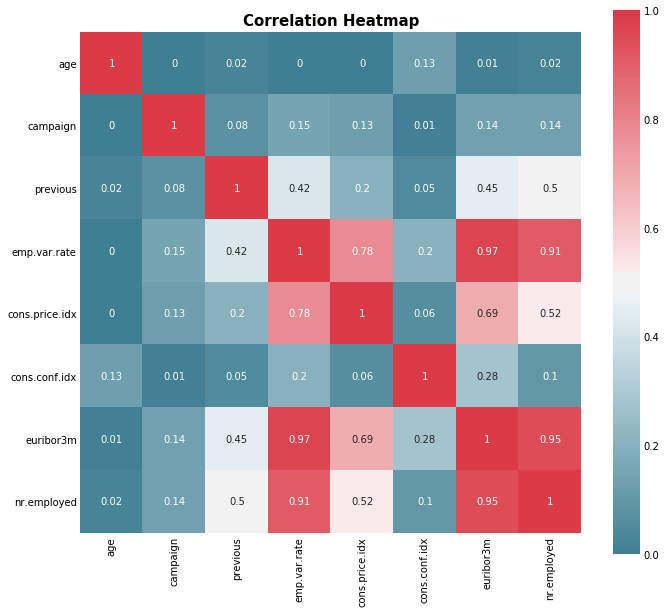

In [47]:
# plot a heatmap of correlations for our categorical values
correlation = abs(round(cont_data.corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** emp.var.rate looks to be the most highly correlated with other values, with three correlations over .7. Let's drop that from the data and see what happens. 

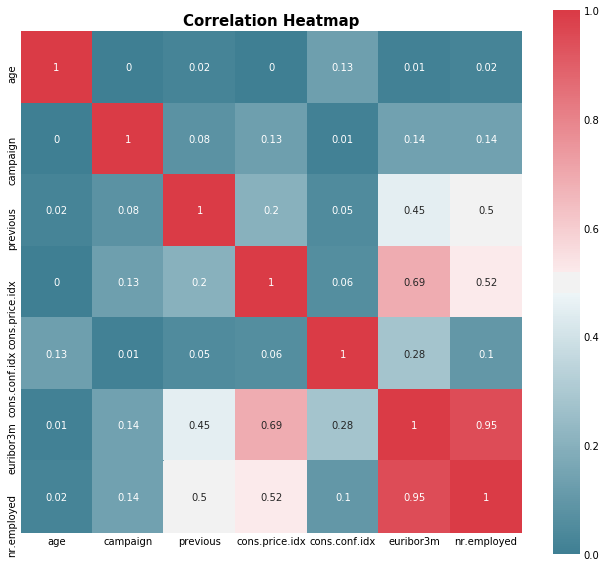

In [48]:
# check correlations without the 'emp.var.rate' variable 
correlation = abs(round(cont_data.drop(columns=['emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** This looks much better. We now only see a very high correlation between nr.employed and euribor3m. However, euribor also has a nearly high correlation with cons.price.idx, so let's dorp that one as well and see where we are then. 

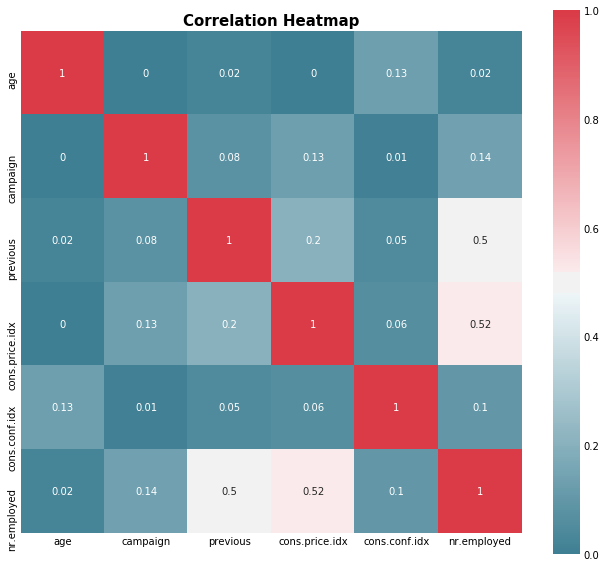

In [49]:
# check correlations without 'euribor3m' and 'emp.var.rate'
correlation = abs(round(cont_data.drop(columns=['euribor3m', 'emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** This looks much better. We're now seeing no high correlations between any of our continuous variables. 

#### Modeling data 
We now know which variables we want to use for our initial modeling. All of our previous categorical variables, plus the remaining continuous variables. 

We still have a lot of **feature transformation** to do, and depending on the performance of our models we may still **add data back** later if it makes sense. But, for now let's drop those variables and move forward with transformations

In [50]:
# create a copy of our data withour the continuous variables we want to drop
model_data = data.drop(columns=['euribor3m', 'emp.var.rate']).copy()
model_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  previous     poutcome  cons.price.idx  \
0   may         mon         1         0  nonexistent          93.994   
1   may         mon         1         0  nonexistent          93.994   
2   may         mon         1         0  nonexistent          93.994   
3   may         mon         1         0  nonexistent          93.994   
4   may         mon         1         0  nonexistent          93.994   

   cons.conf.idx  nr.employed   y  p_contacted  
0          -36.4       5191.0  no            0  
1          -36.4       5191.0  no            0  
2          -36.4       5191.0  no            0  
3          -36.4       5191.0  no            0  
4          -36.4       5191.0  no            0

In [51]:
model_data.shape

(41188, 18)

## Transformations

In this section we will start transforming our data to be more readable by machine learning models. We will: 
* **Get dummies:** ML models largely cannot read text strings, so we will transform our categorical variables into series of 0's and 1's with onehot encoding 
* **Train-test split:** Split our data up into our training and test sets
* **Scale data:** transform the variable so that they have a similar scale
* **Deal with class imbalance:** apply SMOTE in order to try to adjust for the imbalance in our label data

At the end of this section we will have a few variations of the data to work with and see which our models perform the best against. 
* **original data** (w/dummies)
* **scaled data**
* **SMOTE data** (we will do this to the scaled data)

### Get Dummies

As mentioned above, ML models don't deal with text strings well, so we'll need to transform our categorical data with one-hot encoding. 

One question for us is **whether or not we want to keep the first value** for our data. That means, do we want to create a 0 or 1 for every categorical value in our data, or, can we by inference drop one of the values and know that all 0's in the remaining data implies a 1 for the value that is no longer represented in the data. 

For a binary variable the choice is obvious, we want to drop the first because the opposite value is obvious. But for categorical variables with more than 2 values it might not be as obvious. 

This choice does come at a cost. Keeping the first value for all of our data will increase the dimensionality and therefor the computing resources required to run our models. 

As this is a project for learning purposes let's go with the method that is the most inclusive for now and **keep the fist value.** We can go back and drop the binary values that are truly unnecessary, and let's see how our model does. 

Let's first check to see which variables are binary, so we'll know where we want to go back and drop. 

In [52]:
# check the unique values for each variable
for col in model_data.columns.values:
    if model_data[col].nunique() == 2:
        print(f'{col} is binary')

housing is binary
loan is binary
contact is binary
y is binary
p_contacted is binary


Ok, now we know which values to look for. It looks like we'll only have to go back and drop a few.

In [53]:
# one-hot encode model_data, check the first 5 rows and shape
data_w_dummies = pd.get_dummies(model_data, drop_first=False)
display(data_w_dummies.head())
data_w_dummies.shape

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0           0                0                 0              1   
1            0           0                0                 0              0   
2            0           0                0                 0              0   
3            0           1                0                 0              0   
4            0           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               0               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            0                 0   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0                1               0                   1                   0   
1                1               0                   0                   0   
2                1               0                   0                   0   
3                1               0                   0                   1   
4                1               0                   0                   0   

   education_basic.9y  education_high.school  education_illiterate  \
0                   0                      0                     0   
1                   0                      1                     0   
2                   0                      1                     0   
3                   0                      0                     0   
4                   0                      1                     0   

   education_professional.course  education_university.degree  default_no  \
0                              0                            0           1   
1                              0                            0           0   
2                              0                            0           1   
3                              0                            0           1   
4                              0                            0           1   

   default_unknown  default_yes  housing_no  housing_yes  loan_no  loan_yes  \
0                0            0           1            0        1         0   
1                1            0           1            0        1         0   
2                0            0           0            1        1         0   
3                0            0           1            0        1         0   
4                0            0           1            0        0         1   

   contact_cellular  contact_telephone  month_apr  month_aug  month_dec  \
0                 0                  1          0          0          0   
1                 0                  1          0          0          0   
2                 0                  1          0          0          0   
3                 0                  1          0          

(41188, 58)

Let's check what are new variables are, there are 58 of them! 

In [54]:
# check column names
data_w_dummies.columns

Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'p_contacted', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'

Based on above, will **drop**:
* loan_no
* housing_no
* contact_telephone
* y_no (our target)
* p_contacted was already encoded

It will be interesting to see if any of these features have any importance. As noted above in our categorical variable analysis we know the 'loan' and 'housing' doing seem to be very strong predictors. 

In [55]:
# drop our redundant binary variables and inspect the dataframe
data_w_dummies.drop(columns=['loan_no', 'housing_no', 
                             'contact_telephone', 'y_no'], 
                    inplace=True)
display(data_w_dummies.head())
data_w_dummies.shape

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0           0                0                 0              1   
1            0           0                0                 0              0   
2            0           0                0                 0              0   
3            0           1                0                 0              0   
4            0           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               0               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            0                 0   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0                1               0                   1                   0   
1                1               0                   0                   0   
2                1               0                   0                   0   
3                1               0                   0                   1   
4                1               0                   0                   0   

   education_basic.9y  education_high.school  education_illiterate  \
0                   0                      0                     0   
1                   0                      1                     0   
2                   0                      1                     0   
3                   0                      0                     0   
4                   0                      1                     0   

   education_professional.course  education_university.degree  default_no  \
0                              0                            0           1   
1                              0                            0           0   
2                              0                            0           1   
3                              0                            0           1   
4                              0                            0           1   

   default_unknown  default_yes  housing_yes  loan_yes  contact_cellular  \
0                0            0            0         0                 0   
1                1            0            0         0                 0   
2                0            0            1         0                 0   
3                0            0            0         0                 0   
4                0            0            0         1                 0   

   month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          

(41188, 54)

Let's lets also make sure that our target variable still looks right. It should be roughly 11% 1's. 

In [56]:
# Check the value counts our our target variable
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_yes, dtype: float64

Looks good! Let's move into dividing our data into training and test data. 

### Train-Test Split

To ensure we are creating a model that will have reproducible insights we will split our data into a training set, and a test set. This will help us avoid over-fitting our models by allowing us to test our models on data it has not seen before. We will use a standard convention of reserving 25% of our data for testing.  

In [57]:
# split out our label (target) data and variables
target = data_w_dummies.y_yes
variables = data_w_dummies.drop(columns=['y_yes'])

In [58]:
# check to ensure we've kept the right data
variables.head()

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0           0                0                 0              1   
1            0           0                0                 0              0   
2            0           0                0                 0              0   
3            0           1                0                 0              0   
4            0           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               0               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            0                 0   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0                1               0                   1                   0   
1                1               0                   0                   0   
2                1               0                   0                   0   
3                1               0                   0                   1   
4                1               0                   0                   0   

   education_basic.9y  education_high.school  education_illiterate  \
0                   0                      0                     0   
1                   0                      1                     0   
2                   0                      1                     0   
3                   0                      0                     0   
4                   0                      1                     0   

   education_professional.course  education_university.degree  default_no  \
0                              0                            0           1   
1                              0                            0           0   
2                              0                            0           1   
3                              0                            0           1   
4                              0                            0           1   

   default_unknown  default_yes  housing_yes  loan_yes  contact_cellular  \
0                0            0            0         0                 0   
1                1            0            0         0                 0   
2                0            0            1         0                 0   
3                0            0            0         0                 0   
4                0            0            0         1                 0   

   month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          

In [59]:
# split our date into train and test sets and store in a dictionary 'original_data'
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

original_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

### Scale Data

At times data with largely different scales can have an outsized effect on the performance of a model. We therefore want to scale our data withe Scikit-learn's StandardScaler. This will take each variable in the set and scale it down to similar ranges, but maintain the differentiation in each variable. 

This is important to do **after** our train-test split to **avoid data leakage**, which is accidentally sharing data between the training and test data sets. From Machine Learning Mastery: 

_"The data rescaling process that you performed had knowledge of the full distribution of data in the training dataset when calculating the scaling factors (like min and max or mean and standard deviation). This knowledge was stamped into the rescaled values and exploited by all algorithms in your cross validation test harness."_

https://machinelearningmastery.com/data-leakage-machine-learning/

In [60]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
# fit and transform our traing and test data
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# the StandardScaler turns our data into an array, so if we want to see what
# it looks like with our column names we'll need to put it back into a dataframe
scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=variables.columns)

scaled_df_test = pd.DataFrame(scaled_data_test, 
                              columns=variables.columns)

display(scaled_df_train.head(2))
display(scaled_df_test.head(2))

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0  0.474181 -0.556333  -0.35206       -0.224286       0.951837     0.846389   
1 -0.674294 -0.556333  -0.35206        0.593321      -0.472041     0.846389   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0     -0.19414   -0.584839        -0.539092         -0.190428      -0.161792   
1     -0.19414   -0.584839        -0.539092         -0.190428      -0.161792   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   
1       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0        2.265303        -0.15978    -0.089228         -0.353244   
1        2.265303        -0.15978    -0.089228         -0.353244   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0         0.807802       -0.629698           -0.355097           -0.241699   
1        -1.237927        1.588064           -0.355097           -0.241699   

   education_basic.9y  education_high.school  education_illiterate  \
0            -0.42436              -0.566247             -0.054055   
1            -0.42436               1.766012             -0.054055   

   education_professional.course  education_university.degree  default_no  \
0                       2.562374                    -0.658324    0.513109   
1                      -0.390263                    -0.658324    0.513109   

   default_unknown  default_yes  housing_yes  loan_yes  contact_cellular  \
0        -0.512958    -0.009855    -1.071607 -0.429712           0.75677   
1        -0.512958    -0.009855     0.933178 -0.429712           0.75677   

   month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  \
0  -0.260567   2.388258  -0.067956  -0.458452   -0.38579  -0.116408   
1  -0.260567  -0.418715  -0.067956   2.181255   -0.38579  -0.116408   

   month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0   -0.70582   -0.33584  -0.135135  -0.120206        -0.488378   
1   -0.70582   -0.33584  -0.135135  -0.120206        -0.488378   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0        -0.505649        -0.516027         2.025066        -0.496041   
1        -0.505649         1.937882        -0.493811        -0.496041   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0          -0.34331              0.400118         -0.183473  
1          -0.34331              0.400118         -0.183473

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0 -0.482881  -0.20442  1.675811        1.078021       0.649803    -2.801518   
1  0.569888  -0.20442 -0.352060        0.724414       0.887116     0.334717   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0     -0.19414    1.709872        -0.539092         -0.190428      -0.161792   
1     -0.19414    1.709872        -0.539092         -0.190428      -0.161792   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   
1       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0       -0.441442        -0.15978    -0.089228         -0.353244   
1       -0.441442        -0.15978    -0.089228         -0.353244   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0         0.807802       -0.629698           -0.355097           -0.241699   
1         0.807802       -0.629698           -0.355097           -0.241699   

   education_basic.9y  education_high.school  education_illiterate  \
0            -0.42436              -0.566247             -0.054055   
1            -0.42436               1.766012             -0.054055   

   education_professional.course  education_university.degree  default_no  \
0                      -0.390263                     1.519009    0.513109   
1                      -0.390263                    -0.658324    0.513109   

   default_unknown  default_yes  housing_yes  loan_yes  contact_cellular  \
0        -0.512958    -0.009855    -1.071607  2.327139          0.756770   
1        -0.512958    -0.009855     0.933178 -0.429712         -1.321405   

   month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  \
0  -0.260567  -0.418715  -0.067956  -0.458452   -0.38579  -0.116408   
1  -0.260567  -0.418715  -0.067956  -0.458452   -0.38579  -0.116408   

   month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0  -0.705820   -0.33584  -0.135135   8.319064        -0.488378   
1   1.416793   -0.33584  -0.135135  -0.120206        -0.488378   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0        -0.505649        -0.516027        -0.493811         2.015961   
1        -0.505649        -0.516027         2.025066        -0.496041   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0          2.912816             -2.499261         -0.183473  
1         -0.343310              0.400118         -0.183473

We can see here that our data has been scaled such that each variable exists in a common range. While this affect the values of our variables it shouldn't affect the distributions. Let's take a look at one example to see. 

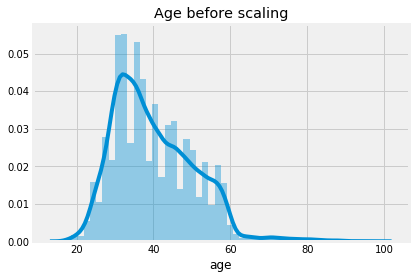

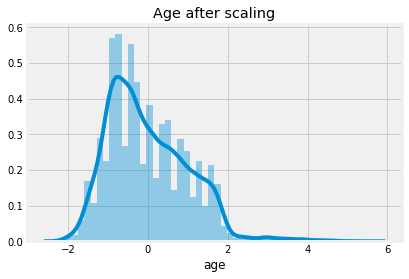

In [62]:
# age before scaleing
sns.distplot(model_data.age)
plt.title('Age before scaling')
plt.show()
# age after scaling
sns.distplot(scaled_df_train.age)
plt.title('Age after scaling')
plt.show()


We see that the data is distributed the same, but now we have a much different range of values

In [63]:
# put our scaled data in a dictionary for ease of working with it later
scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 
               'X_test': scaled_df_test, 'y_test':y_test}

### Class Imbalance - SMOTE

As we've seen above we have somewhat of a class imbalance issue. Only \~11% of our label data is a "yes" or "1".
This needs to be accounted for in order to keep the model from being accurate by simply predicting the right outcome 89% of the time, which is already the prevalence of 0's in the data. 

One way of addressing this issue is through oversampling our positive data. To do this, we will use the Synthetic Minority Oversampling Technique (SMOTE). SMOTE generates new sample data for the minority class (in this case a 1 for 'y_yes' by creating 'synthetic' samples that are combinations of the closest minority class observations.

In [64]:
from imblearn.over_sampling import SMOTE 

Using TensorFlow backend.


In [65]:
# Previous original class distribution
print('Original class distribution: \n')
print(target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_df_train
                                                        , y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    36548
1     4640
Name: y_yes, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    27396
0    27396
dtype: int64


It looks like we've effectively oversampled our data. Let's make this into a dataframe again to help keep track or our feature labels.

In [66]:
# create a dataframe with the resamples X_train
X_train_df_resampled = pd.DataFrame(X_train_resampled, columns=scaled_df_train.columns)
X_train_df_resampled.head(2)

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0  0.474181 -0.556333  -0.35206       -0.224286       0.951837     0.846389   
1 -0.674294 -0.556333  -0.35206        0.593321      -0.472041     0.846389   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0     -0.19414   -0.584839        -0.539092         -0.190428      -0.161792   
1     -0.19414   -0.584839        -0.539092         -0.190428      -0.161792   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   
1       -0.275552    -0.208673          -0.186932     -0.325417    -0.149123   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0        2.265303        -0.15978    -0.089228         -0.353244   
1        2.265303        -0.15978    -0.089228         -0.353244   

   marital_married  marital_single  education_basic.4y  education_basic.6y  \
0         0.807802       -0.629698           -0.355097           -0.241699   
1        -1.237927        1.588064           -0.355097           -0.241699   

   education_basic.9y  education_high.school  education_illiterate  \
0            -0.42436              -0.566247             -0.054055   
1            -0.42436               1.766012             -0.054055   

   education_professional.course  education_university.degree  default_no  \
0                       2.562374                    -0.658324    0.513109   
1                      -0.390263                    -0.658324    0.513109   

   default_unknown  default_yes  housing_yes  loan_yes  contact_cellular  \
0        -0.512958    -0.009855    -1.071607 -0.429712           0.75677   
1        -0.512958    -0.009855     0.933178 -0.429712           0.75677   

   month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  \
0  -0.260567   2.388258  -0.067956  -0.458452   -0.38579  -0.116408   
1  -0.260567  -0.418715  -0.067956   2.181255   -0.38579  -0.116408   

   month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0   -0.70582   -0.33584  -0.135135  -0.120206        -0.488378   
1   -0.70582   -0.33584  -0.135135  -0.120206        -0.488378   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0        -0.505649        -0.516027         2.025066        -0.496041   
1        -0.505649         1.937882        -0.493811        -0.496041   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0          -0.34331              0.400118         -0.183473  
1          -0.34331              0.400118         -0.183473

In [67]:
# store our SMOTE data in a dictionary
SMOTE_data = {'X_train': X_train_df_resampled, 'y_train':y_train_resampled,
              'X_test': scaled_df_test, 'y_test':y_test}

### Transformation Conclusions

We've completed our data transformations for now and are ready to being modeling. We're moving forward with three versions of our data:
* original data
* scaled data
* SMOTE data

There is always more we can do to the data. But it is important to keep it and unadulterated as we can. If we do decide to do more we can always explore: 
* Dimensionality reduction with Principal Component Analysis (PCA)
* Adding the data we removed back in
* Removing features that appear to not have much importance

# Modeling

We're ready to start modeling! A very exciting phase of the project. We'll start o see what, if any, impact our transformations have had on model performance, and to try out a number of different models to see which performs best. 

As this is a project for learning purposes, we're going to try out a lot of models. In this section we will work through
* **Logistic Regression**
* **K-Nearest Neighbors**
* **Decision Trees and Random Forest**
* **XGBoost**
* **Support Vector Machines (SVM)**

We'll also apply a grid search method to each to see if we can work through a range of hyper-parameters to find a what performs best. In short, we'll be doing a lot! 

### Model Scoring Notes:
As we work though our models we'll be looking at a few common ML metrics to determine which model and data treatment is performing best. We will observe: 

**Train Accuracy vs. Test Accuracy:** We'll be primarily comparing these two metrics to check for overfitting - if there is a large gap bewtween the two (more than 10%) we'll consider the model potentially overfit

**Test Accuracy:** Accuracy is the total number of predictions the model gets right (True Positives + True Negatives) / Total observations
* Accuracy is good simple metric to judge the performance of a classification model, but it can be misleading in cases with a class imbalance. It is relatively easy to be highly accurate if most of the data is labeled one way.

**Precision:** Precision refers to how accurate the model is at predicting positive cases correctly - True Positive / (True Positive + False Positive)
* Precision is a good metric to use when the **costs of false positives are high**. Example: Evidence that suggests a person is guilty of a crime (like DNA matching). False positives in this example would have a severe cost to the person accused of the crime, precision is therefore very important. 

**Recall:** Recall refers to how many actual positives the model captures by labeling it correctly - True Positive / (True Positive + False Negative)
* Recall is a good metric to use when the **costs of false negatives are high**. Example: Detecting fraud or serious illnesses - either example can have a serious effect for an organization that fails to detect fraud early enough,or for a patient that needs care or could potentially be contagious

**F1 score:** F1 score is a balanced metric that combines precision and recall
* This metric is best used when seeking a balance between precision and recall and performs well with unbalanced data. It penalizes models that skew too heavily toward precision or recall, and therefore will only be high if both are high.

So, **which metric is best for our business problem?** 
* In our case we are trying to determine which customers are most likely to say "yes" and subscribe to our banking product 
* What is the cost of a False Positive (we predict a customer will subscribe but they will not)?
    * We unnecessarily target them for more marketing - costing time and resources
    * We potentially annoy them by contacting them too much and turn them off from future campaigns
* What is the cost of a False Negative (we predict a customer would not subscribe but they would)?
    * We do not target them with additional marketing when it may be productive
    * We potentially miss out on gaining this person as a customer
    
It seems our trade-off is between the cost of marketing to a customer that is unlikely to subscribe and the missed revenue of failing to gain a customer that would subscribe. Let's assume that marketing to one additional customer has a relatively low cost, and the lifetime value of having an additional customer is relatively high. In this case, I would **prioritze recall** when evaluating my model metrics. 

We will monitor accuracy for overall model performance as well, and look to F1 score as a secondary metric to try to maintain some balance in our model results.  

### Model Results Dataframe

In order to track the results of all of our models and easily compare them, we will create an empty dataframe with the metrics we will use to measure our model performance, and also a helper function that can run our models and add metrics iteratively.

In [68]:
model_results = pd.DataFrame(columns=['model','data','train_accuracy', 
                                      'test_accuracy', 'precision','recall', 
                                      'f1_score'])
model_results

Empty DataFrame
Columns: [model, data, train_accuracy, test_accuracy, precision, recall, f1_score]
Index: []

In [69]:
# create a helper function that fits a model to training data
# captures performance metrics, and records them in our dataframe
def add_model_results(model, data, model_name, data_name, df=model_results):
    
    model.fit(data['X_train'], data['y_train'])
    train_preds = model.predict(data['X_train'])
    test_preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], test_preds)
    r_score = recall_score(data['y_test'], test_preds)
    train_accuracy = accuracy_score(data['y_train'], train_preds)
    test_accuracy = accuracy_score(data['y_test'], test_preds)
    f_score = f1_score(data['y_test'], test_preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'train_accuracy': round(train_accuracy, 3),
               'test_accuracy': round(test_accuracy, 3),
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores, ignore_index=True)
    
    return df

In [70]:
# put our diffent data treatments in a list for easy iteration
modeling_data1 = [original_data, scaled_data, SMOTE_data]
modeling_data1_names = ['original_data', 'scaled_data', 'SMOTE_data']

## Logistic Regression

The first model that we'll work with is Logistic Regression. This model is  well suited for binary classification, which we are seeking to do, and attempts to fit a curved line to our binary label data by estimating coefficients for each feature in our dataset. 

In [71]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

In [72]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg,
                                      data=d,
                                      model_name="LogisticRegression",
                                      data_name = modeling_data1_names[i])
    print('LogisticRegression: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], logreg.predict(d['X_test'])), '\n')
    
model_results

LogisticRegression: original_data
[[8990  162]
 [ 866  279]] 

LogisticRegression: scaled_data
[[9006  146]
 [ 871  274]] 

LogisticRegression: SMOTE_data
[[7617 1535]
 [ 431  714]] 



model           data  train_accuracy  test_accuracy  \
0  LogisticRegression  original_data           0.900          0.900   
1  LogisticRegression    scaled_data           0.901          0.901   
2  LogisticRegression     SMOTE_data           0.742          0.809   

   precision  recall  f1_score  
0      0.633   0.244     0.352  
1      0.652   0.239     0.350  
2      0.317   0.624     0.421

#### Logistic Regression Observations:
* None of the models appeal to overfit - accuracy actually improves for test date with our SMOTE set
* Observing our confusion matrices we can see how the SMOTE model predicts a much larger number of positive cases overall, demonstrating the greater recall, but much lower precision
* Accuracy is much higher for our original and scaled sets, but **recall is low**. Given our class imbalance issue the accuracy in the original data is not too surprising
* Recall is and **F1** are much higher for the SMOTE data. Even with the lower accuracy, I would want to use this model at this point it was all we had to work with.  

### Logistic Regression Grid Search

As mentioned previously, while we are still learning which hyperparameters are best for a model and data like this, one method we can use to explore many of them is to conduct a grid search via Scikit-learn's **GridSearchCV**.

One thing that is cool about this method is that is builds in cross validation, which is one more tool for avoiding over-fitting our model. 

We will try to keep our number of hyperparameters low so that we don't have to spend too much tome computing, but since this is also a learning exercise we will give up a little efficiency and try out a few. 

LogReg hyperparameters we will variations for include: 
* C = inverse regularization strength - applies a penalty to increasing the magnitude of parameter values in order to reduce overfitting
* solver = algorithms used by the model
* class_weight = weights associated with classes

In [73]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[.5,1,2],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

We will run a grid search that:
* does three cross-validation folds
* prioritizes the recall metric

In [74]:
# establish the gridsearch model for logreg
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='recall',
                         n_jobs=-1)

In [75]:
# fit the logreg_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg_gs,
                                      data=d,
                                      model_name="GridSearch-logreg",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-logreg: ', modeling_data1_names[i])
    print('Best parameters: ',  logreg_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], logreg_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-logreg:  original_data
Best parameters:  {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7789 1363]
 [ 465  680]] 

GridSearch-logreg:  scaled_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7761 1391]
 [ 449  696]] 

GridSearch-logreg:  SMOTE_data
Best parameters:  {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'} 

[[7617 1535]
 [ 431  714]] 



model           data  train_accuracy  test_accuracy  \
0  LogisticRegression  original_data           0.900          0.900   
1  LogisticRegression    scaled_data           0.901          0.901   
2  LogisticRegression     SMOTE_data           0.742          0.809   
3   GridSearch-logreg  original_data           0.824          0.822   
4   GridSearch-logreg    scaled_data           0.825          0.821   
5   GridSearch-logreg     SMOTE_data           0.742          0.809   

   precision  recall  f1_score  
0      0.633   0.244     0.352  
1      0.652   0.239     0.350  
2      0.317   0.624     0.421  
3      0.333   0.594     0.427  
4      0.333   0.608     0.431  
5      0.317   0.624     0.421

#### Logistic Regression Grid Search Observations
* When prioritizing recall accuracy scores remain lower
* Recall did significantly improve among our original and scaled data
* F1 is now the highest for the original data 

## K-Nearest Neighbors

K-Nearest Neighbors (KNN) attempts to classify our data by measuring the proximity of the K closest data points and making and estimation for the label data. With the high dimensionality of our dataset this will be a very computationally intensive model. Let's see what results we get. 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [77]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=knn_clf,
                                      data=d,
                                      model_name="KNeighborsClassifier",
                                      data_name = modeling_data1_names[i])
    print('KNeighborsClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], knn_clf.predict(d['X_test'])), '\n')
    
model_results

KNeighborsClassifier: original_data
[[8806  346]
 [ 841  304]] 

KNeighborsClassifier: scaled_data
[[8881  271]
 [ 844  301]] 

KNeighborsClassifier: SMOTE_data
[[7238 1914]
 [ 523  622]] 



model           data  train_accuracy  test_accuracy  \
0    LogisticRegression  original_data           0.900          0.900   
1    LogisticRegression    scaled_data           0.901          0.901   
2    LogisticRegression     SMOTE_data           0.742          0.809   
3     GridSearch-logreg  original_data           0.824          0.822   
4     GridSearch-logreg    scaled_data           0.825          0.821   
5     GridSearch-logreg     SMOTE_data           0.742          0.809   
6  KNeighborsClassifier  original_data           0.913          0.885   
7  KNeighborsClassifier    scaled_data           0.912          0.892   
8  KNeighborsClassifier     SMOTE_data           0.920          0.763   

   precision  recall  f1_score  
0      0.633   0.244     0.352  
1      0.652   0.239     0.350  
2      0.317   0.624     0.421  
3      0.333   0.594     0.427  
4      0.333   0.608     0.431  
5      0.317   0.624     0.421  
6      0.468   0.266     0.339  
7      0.526   0.263     0.351  
8      0.245   0.543     0.338

#### KNN Observations:
* Our first run of KNN appears to have behaved similarly to the LogReg model in that it has higher accuracy scores, but low precision for the original and scaled data
* The SMOTE model appears to potentially be overfit, as there is a fairly large gap between the train and test accuracy. 
* Given the computational expense and low performance on for this model we probably would not suggest it for this application

Due to the low performance and computational expense we'll just try Grid Search on one set of data. The scaled data performed the best, so we will try that.  

### KNN Grid Search

The KNN hyperparameters we will try are:
* n_neighbors: the number of neighbors the model uses to estimate a label
* weights: weight function used in prediction
* p: power parameter - equivalent of using manhattan distance, euclidean distance

In [78]:
## Create a parameter grid to identify optimal parameters
knn_param_grid = {'n_neighbors':[3,5,7],
                     'weights':['uniform', 'distance'],
                     'p': [1, 2, 3]}

In [79]:
knn_clf_gs = GridSearchCV(knn_clf,
                          knn_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [80]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=scaled_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='scaled_data')

print('KNN Best Parameters: ', knn_clf_gs.best_params_)

print(confusion_matrix(scaled_data['y_test'], 
                       knn_clf_gs.predict(scaled_data['X_test'])))


model_results

KNN Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
[[8618  534]
 [ 811  334]]


model           data  train_accuracy  test_accuracy  \
0    LogisticRegression  original_data           0.900          0.900   
1    LogisticRegression    scaled_data           0.901          0.901   
2    LogisticRegression     SMOTE_data           0.742          0.809   
3     GridSearch-logreg  original_data           0.824          0.822   
4     GridSearch-logreg    scaled_data           0.825          0.821   
5     GridSearch-logreg     SMOTE_data           0.742          0.809   
6  KNeighborsClassifier  original_data           0.913          0.885   
7  KNeighborsClassifier    scaled_data           0.912          0.892   
8  KNeighborsClassifier     SMOTE_data           0.920          0.763   
9        GridSearch-KNN    scaled_data           0.994          0.869   

   precision  recall  f1_score  
0      0.633   0.244     0.352  
1      0.652   0.239     0.350  
2      0.317   0.624     0.421  
3      0.333   0.594     0.427  
4      0.333   0.608     0.431  
5      0.317   0.624     0.421  
6      0.468   0.266     0.339  
7      0.526   0.263     0.351  
8      0.245   0.543     0.338  
9      0.385   0.292     0.332

#### KNN Grid Search Observations: 
* This iteration of the model has much higher accuracy, but appears that it may still be overfit. 
* Recall and F1 are still relatively low compared to other models
* Given the computational intensity and problem with overfitting for this model we will likely not revisit using it later on. If we do, it will be with much fewer parameters. 

## Decision Tree & Random Forest

In this section we will use Decision Tree and Random Forest classification models to see if we can find am method that performs better than our previous attempts. 

Both methods are built top-down from a single node that uses information gain, or entropy, to iteratively branch into smaller and smaller subsets of the data, ultimately ending in "leaves" that have gained the maximal amount of information based on the values of our variables. These models are "strong learners," which means that at each decision point the model will seek to gain the split that gains the greatest amount of information possible, and then pursues that "branch" until it is exhausted, or meets constraints set by model parameters. 

Random Forest is slightly different from a basic decision tree in that it is an ensemble of trees. A Random Forest model will create a series of smaller trees using only a few variables or features. Upon completion of constructing it's trees, trees with more predictive power get a stronger "vote" for predicting label data. 

Below we will run both models and evaluate them using similar criteria as above. 

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 

In [83]:
# fit the tree_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf,
                                      data=d,
                                      model_name="DecisionTreeClassifier",
                                      data_name = modeling_data1_names[i])
    print('DecisionTreeClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], tree_clf.predict(d['X_test'])), '\n')
    
model_results

DecisionTreeClassifier: original_data
[[8965  187]
 [ 855  290]] 

DecisionTreeClassifier: scaled_data
[[8965  187]
 [ 855  290]] 

DecisionTreeClassifier: SMOTE_data
[[8116 1036]
 [ 513  632]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449

#### Decision Tree Observations: 
* Similar to previous models the original and scaled data performed very similarly (exactly the same actually), and had higher accuracy scores but lower recall and F1
    * It is interesting that results are exactly the same for original and scaled data. Scaling must not be as necessary for this data and particular model. 
* SMOTE again has much higher recall and our best F1 so far
    * Accuracy goes up for our test set again. This could be an issue with how our data is split and we may need to look into it later
* Compared to our other models this was incredibly fast. We can likely iterate over this model a lot during gridsearch if we like

Let's also take a look at how our features were considered in this model by plotting them with a quick helper function.

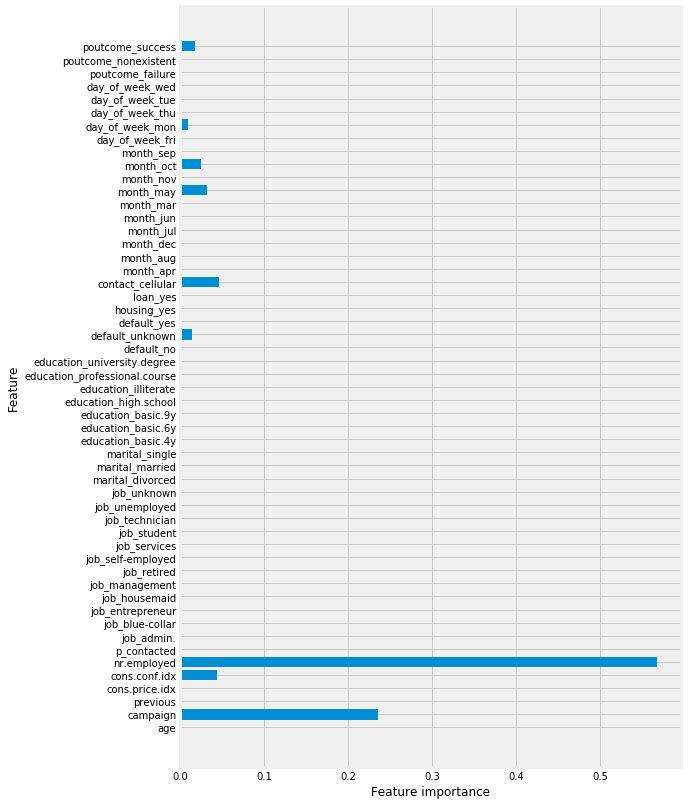

In [84]:
# create a funtion that takes model feature importances and plots them in a bar chart
def plot_feature_importances(model):
    n_features = scaled_data_train.shape[1]
    plt.figure(figsize=(8,14))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

**Observation:** It appears that our model only used a very small number of our features, with **nr.employed, campaign, cons.conf.ix, and contact_cellular** being among the most important

In [85]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

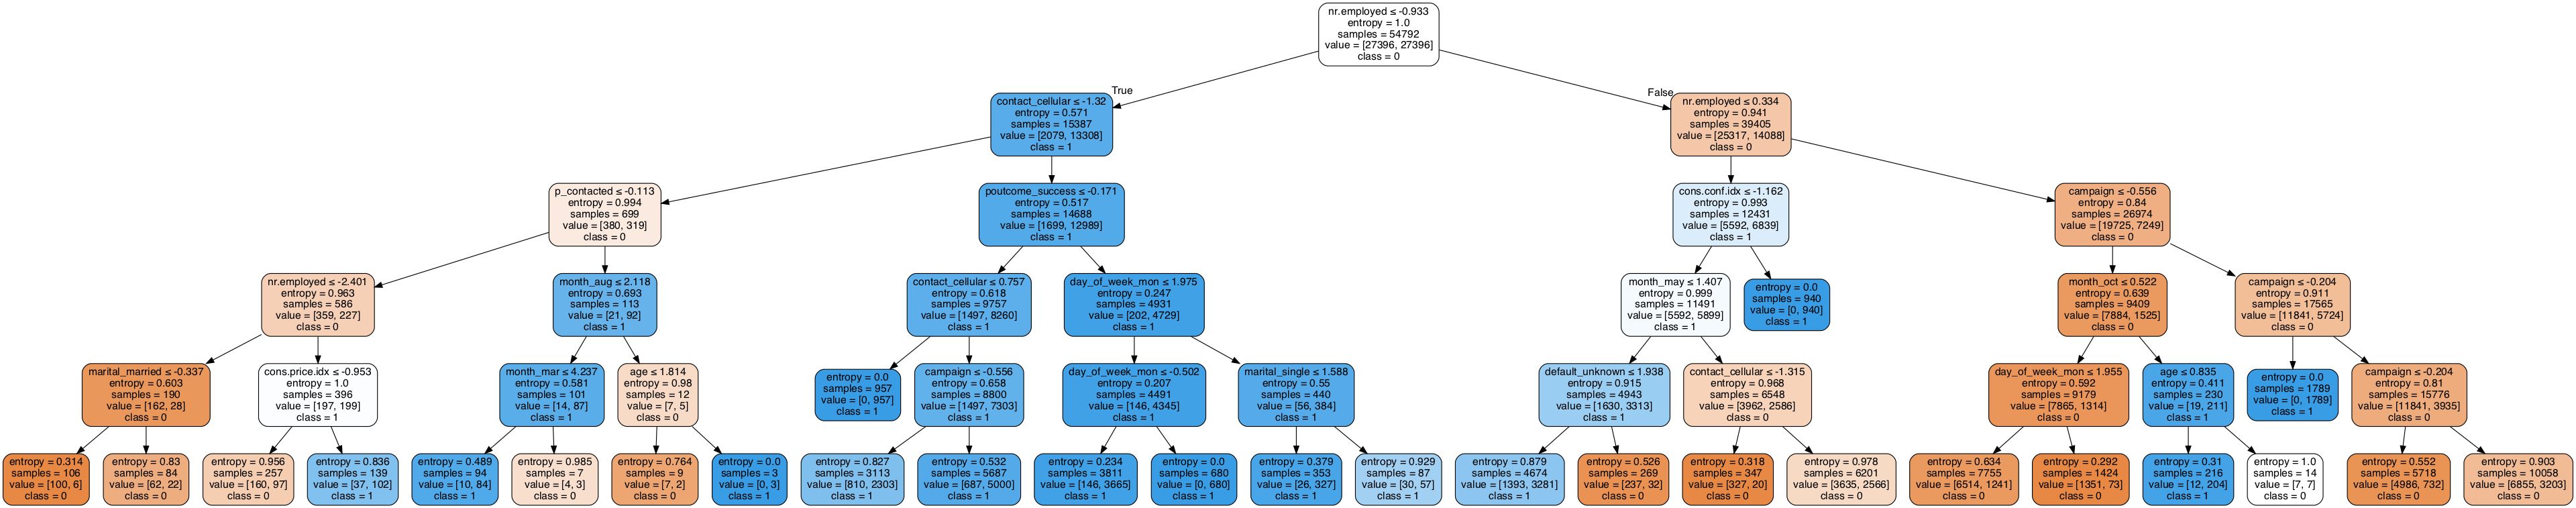

In [86]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

### Decision Tree Grid Search

For our decision tree models we will look at the following hyperparameters:
* criterion: The function to measure the quality of a split
* max_depth: The maximum depth of the tree.
* min_samples_split: The minimum number of samples required to split an internal node

In [87]:
# Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [5, 25, 50, 100]}

In [88]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [89]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree:  original_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[8452  700]
 [ 803  342]] 

GridSearch-tree:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[8454  698]
 [ 801  344]] 

GridSearch-tree:  SMOTE_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[8354  798]
 [ 781  364]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   
13         GridSearch-tree  original_data           0.966          0.854   
14         GridSearch-tree    scaled_data           0.966          0.854   
15         GridSearch-tree     SMOTE_data           0.982          0.847   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449  
13      0.328   0.299     0.313  
14      0.330   0.300     0.315  
15      0.313   0.318     0.316

#### Decision Tree Grid Search Observations:
* We're at risk of overfitting for some of our models in this iteration, particularly the SMOTE data
* Entropy appears to be the best criterion with no max depth set and min-sample split at 5 
* Of these three, the original data appears to perform the best, but is not better than some of our previous models

Let's fit the model again with our chosen data and parameters and see what we are working with.

In [90]:
# set the optimal parameters for the tree clf and fit again
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=25) 
tree_clf.fit(X=original_data['X_train'], y=original_data['y_train'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

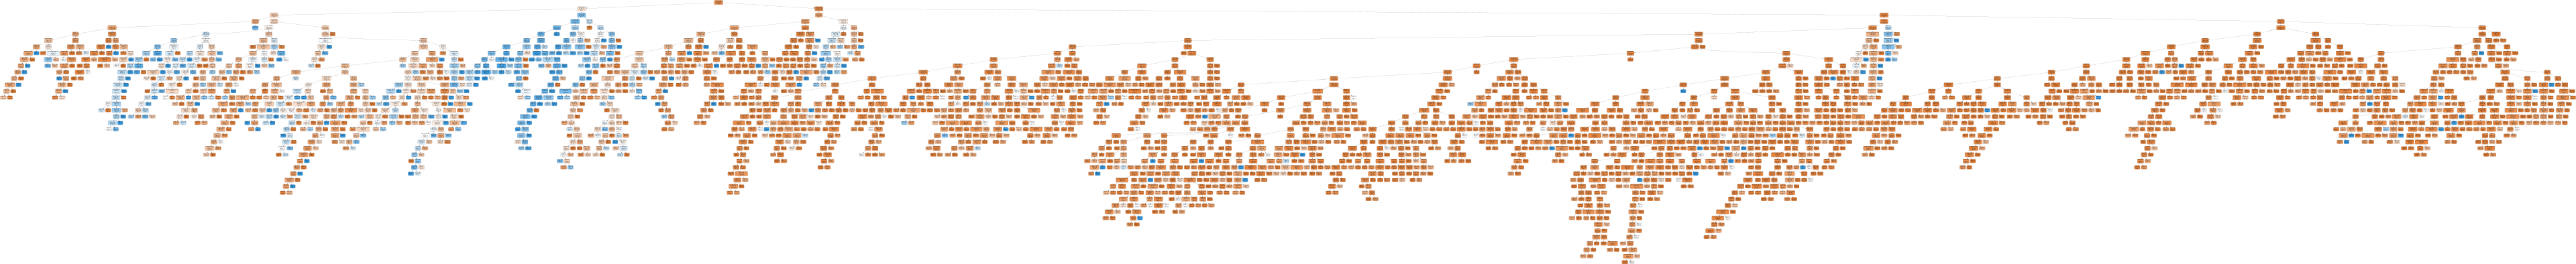

In [91]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

**Whoa!** It looks like allowing no max depth has let our model go crazy. No wonder we seem to be seeing some overfitting. Since it's so computationally easy lets try again and take out the "None" value. But, before we do let's take a look at the feature importance for this model. 

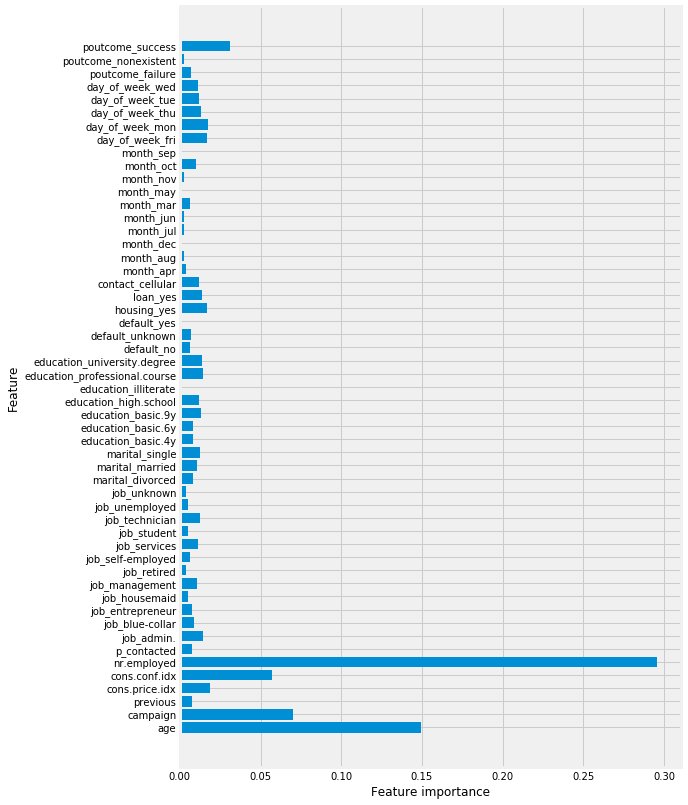

In [92]:
# plot feature importances for the last iteration of tree_clf
plot_feature_importances(tree_clf)

In [93]:
## Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,7],
                   'min_samples_split': [5, 25, 50, 100]}

In [94]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [95]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree_2",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree2: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree2:  original_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 100} 

[[8964  188]
 [ 853  292]] 

GridSearch-tree2:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 100} 

[[8964  188]
 [ 853  292]] 

GridSearch-tree2:  SMOTE_data
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 25} 

[[8358  794]
 [ 581  564]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   
13         GridSearch-tree  original_data           0.966          0.854   
14         GridSearch-tree    scaled_data           0.966          0.854   
15         GridSearch-tree     SMOTE_data           0.982          0.847   
16       GridSearch-tree_2  original_data           0.903          0.899   
17       GridSearch-tree_2    scaled_data           0.903          0.899   
18       GridSearch-tree_2     SMOTE_data           0.850          0.866   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449  
13      0.328   0.299     0.313  
14      0.330   0.300     0.315  
15      0.313   0.318     0.316  
16      0.608   0.255     0.359  
17      0.608   0.255     0.359  
18      0.415   0.493     0.451

**Observations**
* This is a great example of how we can **improve model performance by refining parameters to reduce overfitting**
* The models using the original and scaled data very slightly improved, but interestingly are exactly the same again
* The SMOTE model has improved significantly, with much closer and improved train-test accuracy, and the **highest F1 so far** .457

Let's fit, visualize, and check feature importance one last time before we move on to random forest.

In [96]:
# set the optimal parameters for the tree clf and fit again
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=50) 
tree_clf.fit(X=SMOTE_data['X_train'], y=SMOTE_data['y_train'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

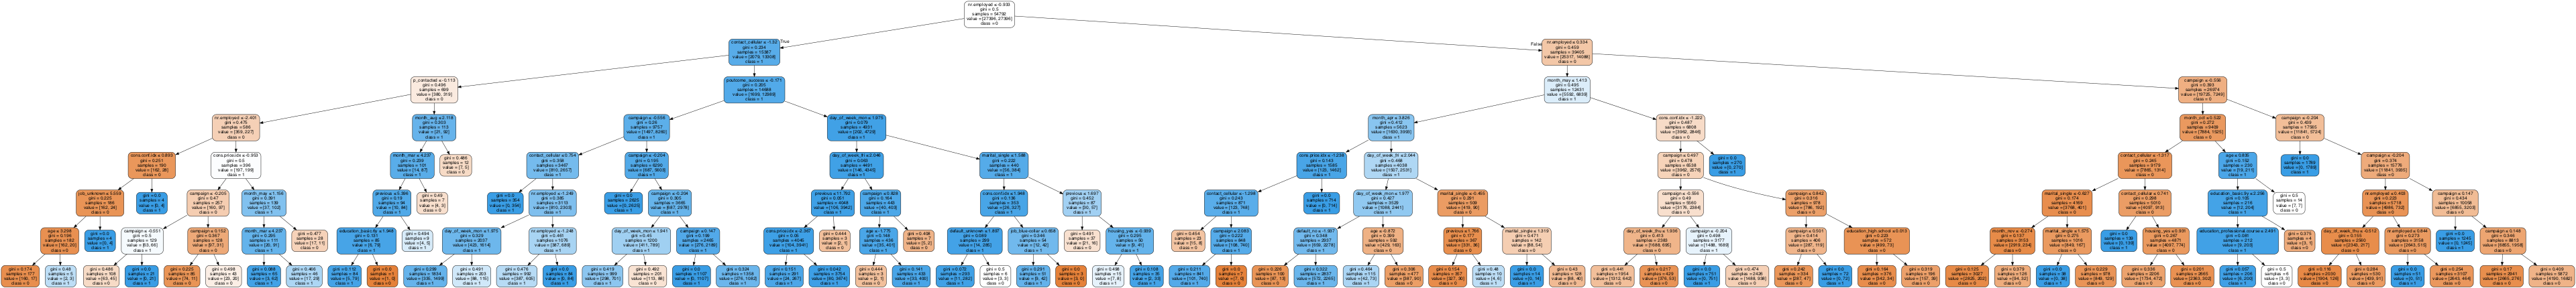

In [97]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

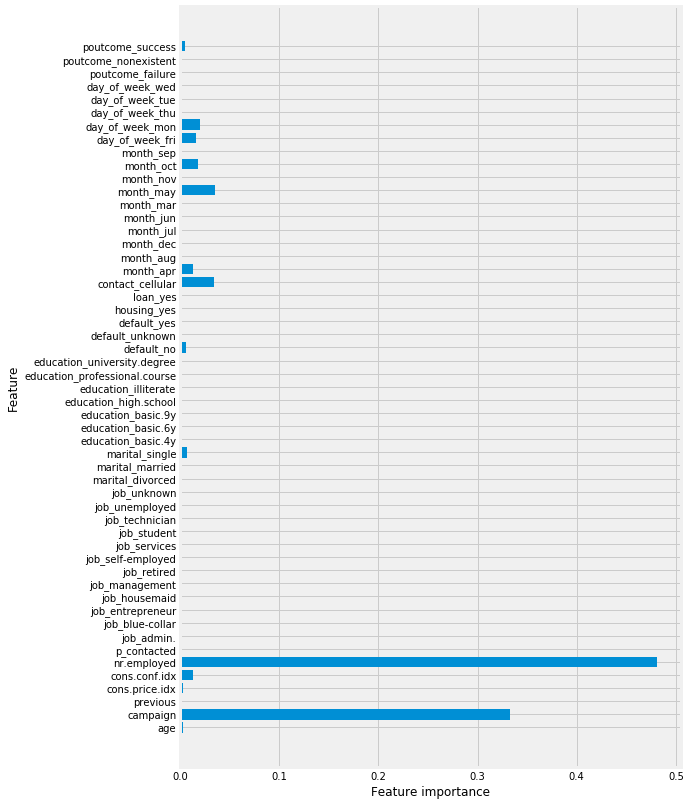

In [98]:
plot_feature_importances(tree_clf)

**Observations:** 
* It looks like we've returned to a more reasonable number of splits and features used
* **nr.employed and campaign** remain the most important features 

### Random Forest

In [99]:
# call our random forest classifier and establish baseline parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [100]:
# fit the forest model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=forest,
                                      data=d,
                                      model_name="RandomForestClassifier",
                                      data_name = modeling_data1_names[i])
    print('RandomForestClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], forest.predict(d['X_test'])), '\n')
    
model_results

RandomForestClassifier: original_data
[[9058   94]
 [ 938  207]] 

RandomForestClassifier: scaled_data
[[9058   94]
 [ 940  205]] 

RandomForestClassifier: SMOTE_data
[[8004 1148]
 [ 477  668]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   
13         GridSearch-tree  original_data           0.966          0.854   
14         GridSearch-tree    scaled_data           0.966          0.854   
15         GridSearch-tree     SMOTE_data           0.982          0.847   
16       GridSearch-tree_2  original_data           0.903          0.899   
17       GridSearch-tree_2    scaled_data           0.903          0.899   
18       GridSearch-tree_2     SMOTE_data           0.850          0.866   
19  RandomForestClassifier  original_data           0.899          0.900   
20  RandomForestClassifier    scaled_data           0.899          0.900   
21  RandomForestClassifier     SMOTE_data           0.788          0.842   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449  
13      0.328   0.299     0.313  
14      0.330   0.300     0.315  
15      0.313   0.318     0.316  
16      0.608   0.255     0.359  
17      0.608   0.255     0.359  
18      0.415   0.493     0.451  
19      0.688   0.181     0.286  
20      0.686   0.179     0.284  
21      0.368   0.583     0.451

#### Random Forest Observations:
* Interestingly the same behavior is present with original and scaled data performing almost exactly the same
* The accuracy of those models is fit very well, put the wrong metric is prioritized with high precision
* The SMOTE data has very high recall and and high F1, but has similar fit issues again. Let's see if we can tune parameters again to account for that.

Let's check feature importances before we move on to the grid search

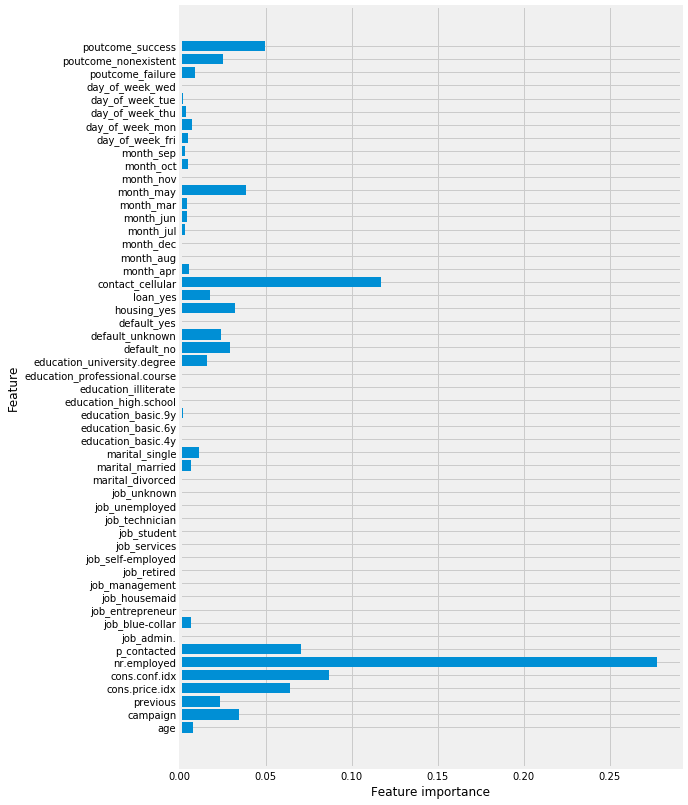

In [101]:
plot_feature_importances(forest)

**Observations:** 
* nr.employed remains the most important feature, but the importance is much more distributed now
* poutcome_success and contact_cellular have picked up significant importance

### Random Forest Grid Search

In [102]:
forest_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, 12],
    'min_samples_split': [5, 10, 25, 50],
    'min_samples_leaf': [3, 6, 12]}

In [103]:
# Instantiate GridSearchCV
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3, 
                         n_jobs=-1)

In [104]:
# fit the forest_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=forest_gs,
                                      data=d,
                                      model_name="GridSearch-forest",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-forest: ', modeling_data1_names[i])
    print('Best parameters: ',  forest_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], forest_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-forest:  original_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 10} 

[[9005  147]
 [ 906  239]] 

GridSearch-forest:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10} 

[[9022  130]
 [ 920  225]] 

GridSearch-forest:  SMOTE_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100} 

[[8415  737]
 [ 548  597]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   
13         GridSearch-tree  original_data           0.966          0.854   
14         GridSearch-tree    scaled_data           0.966          0.854   
15         GridSearch-tree     SMOTE_data           0.982          0.847   
16       GridSearch-tree_2  original_data           0.903          0.899   
17       GridSearch-tree_2    scaled_data           0.903          0.899   
18       GridSearch-tree_2     SMOTE_data           0.850          0.866   
19  RandomForestClassifier  original_data           0.899          0.900   
20  RandomForestClassifier    scaled_data           0.899          0.900   
21  RandomForestClassifier     SMOTE_data           0.788          0.842   
22       GridSearch-forest  original_data           0.904          0.898   
23       GridSearch-forest    scaled_data           0.904          0.898   
24       GridSearch-forest     SMOTE_data           0.901          0.875   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449  
13      0.328   0.299     0.313  
14      0.330   0.300     0.315  
15      0.313   0.318     0.316  
16      0.608   0.255     0.359  
17      0.608   0.255     0.359  
18      0.415   0.493     0.451  
19      0.688   0.181     0.286  
20      0.686   0.179     0.284  
21      0.368   0.583     0.451  
22      0.619   0.209     0.312  
23      0.634   0.197     0.300  
24      0.448   0.521     0.482

**Observations:**
* We have some of our best scores yet in this iteration
* Train and test accuracy is very close fore each model
    * SMOTE data, which has been giving us the best recall scores, is now getting closer to the accuracy level of the original and scaled date
    * This data has the **highest F1** so far at **.487**, with among the highest recall as well
    
These results look great, we **forgot to prioritize recall** in the grid search scoring parameter. Let's run it again to see what happens. 

#### Random Forest Grid Search 2

In [105]:
# Instantiate GridSearchCV, with scoring set to recall
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3,
                         scoring='recall',
                         n_jobs=-1)

In [106]:
# fit the forest_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=forest_gs,
                                      data=d,
                                      model_name="GridSearch-forest_2",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-forest_2: ', modeling_data1_names[i])
    print('Best parameters: ',  forest_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], forest_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-forest_2:  original_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10} 

[[9001  151]
 [ 880  265]] 

GridSearch-forest_2:  scaled_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 10} 

[[8990  162]
 [ 876  269]] 

GridSearch-forest_2:  SMOTE_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 25, 'n_estimators': 100} 

[[8404  748]
 [ 538  607]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.900   
1       LogisticRegression    scaled_data           0.901          0.901   
2       LogisticRegression     SMOTE_data           0.742          0.809   
3        GridSearch-logreg  original_data           0.824          0.822   
4        GridSearch-logreg    scaled_data           0.825          0.821   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
6     KNeighborsClassifier  original_data           0.913          0.885   
7     KNeighborsClassifier    scaled_data           0.912          0.892   
8     KNeighborsClassifier     SMOTE_data           0.920          0.763   
9           GridSearch-KNN    scaled_data           0.994          0.869   
10  DecisionTreeClassifier  original_data           0.903          0.899   
11  DecisionTreeClassifier    scaled_data           0.903          0.899   
12  DecisionTreeClassifier     SMOTE_data           0.796          0.850   
13         GridSearch-tree  original_data           0.966          0.854   
14         GridSearch-tree    scaled_data           0.966          0.854   
15         GridSearch-tree     SMOTE_data           0.982          0.847   
16       GridSearch-tree_2  original_data           0.903          0.899   
17       GridSearch-tree_2    scaled_data           0.903          0.899   
18       GridSearch-tree_2     SMOTE_data           0.850          0.866   
19  RandomForestClassifier  original_data           0.899          0.900   
20  RandomForestClassifier    scaled_data           0.899          0.900   
21  RandomForestClassifier     SMOTE_data           0.788          0.842   
22       GridSearch-forest  original_data           0.904          0.898   
23       GridSearch-forest    scaled_data           0.904          0.898   
24       GridSearch-forest     SMOTE_data           0.901          0.875   
25     GridSearch-forest_2  original_data           0.910          0.900   
26     GridSearch-forest_2    scaled_data           0.909          0.899   
27     GridSearch-forest_2     SMOTE_data           0.894          0.875   

    precision  recall  f1_score  
0       0.633   0.244     0.352  
1       0.652   0.239     0.350  
2       0.317   0.624     0.421  
3       0.333   0.594     0.427  
4       0.333   0.608     0.431  
5       0.317   0.624     0.421  
6       0.468   0.266     0.339  
7       0.526   0.263     0.351  
8       0.245   0.543     0.338  
9       0.385   0.292     0.332  
10      0.608   0.253     0.358  
11      0.608   0.253     0.358  
12      0.379   0.552     0.449  
13      0.328   0.299     0.313  
14      0.330   0.300     0.315  
15      0.313   0.318     0.316  
16      0.608   0.255     0.359  
17      0.608   0.255     0.359  
18      0.415   0.493     0.451  
19      0.688   0.181     0.286  
20      0.686   0.179     0.284  
21      0.368   0.583     0.451  
22      0.619   0.209     0.312  
23      0.634   0.197     0.300  
24      0.448   0.521     0.482  
25      0.637   0.231     0.340  
26      0.624   0.235     0.341  
27      0.448   0.530     0.486

**Observations:**
* Prioritizing recall appears to have helped a lot.
* We still have fairly high and close accuracy, suggesting that our models are not overfit
* Recall is roughly the same as before but F1 is continuing to climb with a better precision score
* SMOTE still appears to be our best performing data
    * Although accuracy is lower, it is gaining on the other data
    * The original and scaled data accuracy is also less impressive once you consider the class imbalance and low precision

Let's apply the parameters we found in our last grid search to the model so that we can take a look at which features it is prioritizing.

In [107]:
forest = RandomForestClassifier(criterion='gini', 
                                max_depth=12,
                                min_samples_leaf=3,
                                min_samples_split=5,
                                n_estimators=100)
forest.fit(X=SMOTE_data['X_train'], y=SMOTE_data['y_train'] )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

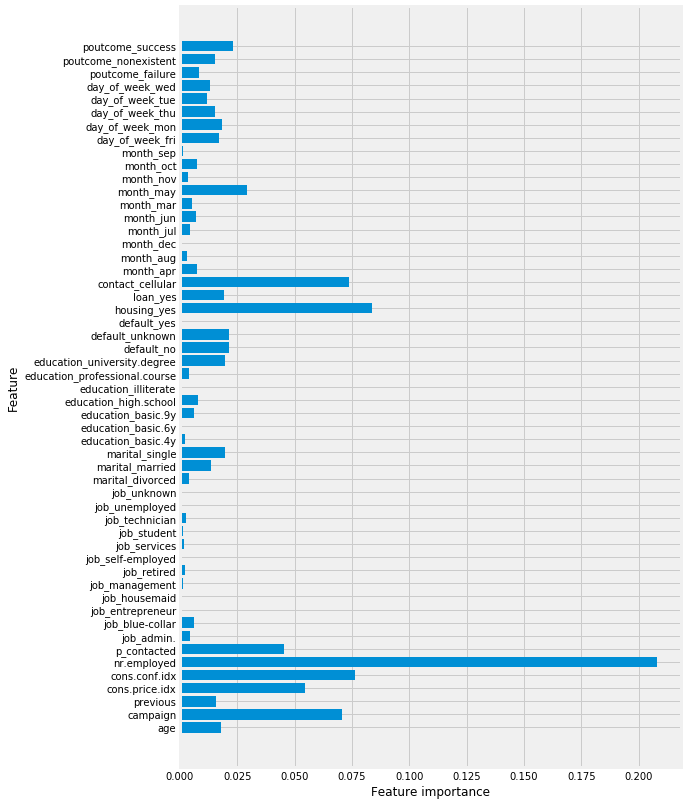

In [108]:
plot_feature_importances(forest)

**Observations:** 
* Similar to before nr.employed remains the most important feature, but it's importance has dropped from \~.2 to \~.175. Other 
* The days of the week have picked up some importance, but they are roughly equal
* Housing_yes had picked up a lot of importance and cellular_yes remain high

## XGBoost

The next model we will work with is XGBoost, which different from the models we just tried is a **weak learner**. This method using a boosting technique to iteratively make guesses that are slightly better than random chance. Then, the model attempts to figure out which examples it got wrong and refocuses on trying to improve those areas in subsequent iterations. It continues this process until it reaches a set stopping point.    

In [109]:
# this script is necessary to run to keep XGBoost from killing the kernal
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [110]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

We've figured out that XGBoost likes to accept data in a different way, so we'll do them one-by-one

In [111]:
# fit the xgb_clf model to the original data and show the confusion matrix 
model_results = add_model_results(model=xgb_clf, 
                                  data=original_data, 
                                  model_name='XGBClassifier',
                                  data_name='original_data')

print(confusion_matrix(original_data['y_test'], 
                       xgb_clf.predict(original_data['X_test'])))

[[8996  156]
 [ 882  263]]


In [112]:
# fit the xgb_clf model to the scaled data and show the confusion matrix 
model_results = add_model_results(model=xgb_clf, 
                                  data=scaled_data, 
                                  model_name='XGBClassifier',
                                  data_name='scaled_data')

print(confusion_matrix(scaled_data['y_test'], 
                       xgb_clf.predict(scaled_data['X_test'])))

[[8996  156]
 [ 882  263]]


In [113]:
# fit the xgb_clf model to the SMOTE data and show the confusion matrix 
model_results = add_model_results(model=xgb_clf, 
                                  data=SMOTE_data, 
                                  model_name='XGBClassifier',
                                  data_name='SMOTE_data')

print(confusion_matrix(SMOTE_data['y_test'], 
                       xgb_clf.predict(SMOTE_data['X_test'])))

[[8647  505]
 [ 684  461]]


In [114]:
model_results.tail()

model           data  train_accuracy  test_accuracy  \
26  GridSearch-forest_2    scaled_data           0.909          0.899   
27  GridSearch-forest_2     SMOTE_data           0.894          0.875   
28        XGBClassifier  original_data           0.904          0.899   
29        XGBClassifier    scaled_data           0.904          0.899   
30        XGBClassifier     SMOTE_data           0.915          0.885   

    precision  recall  f1_score  
26      0.624   0.235     0.341  
27      0.448   0.530     0.486  
28      0.628   0.230     0.336  
29      0.628   0.230     0.336  
30      0.477   0.403     0.437

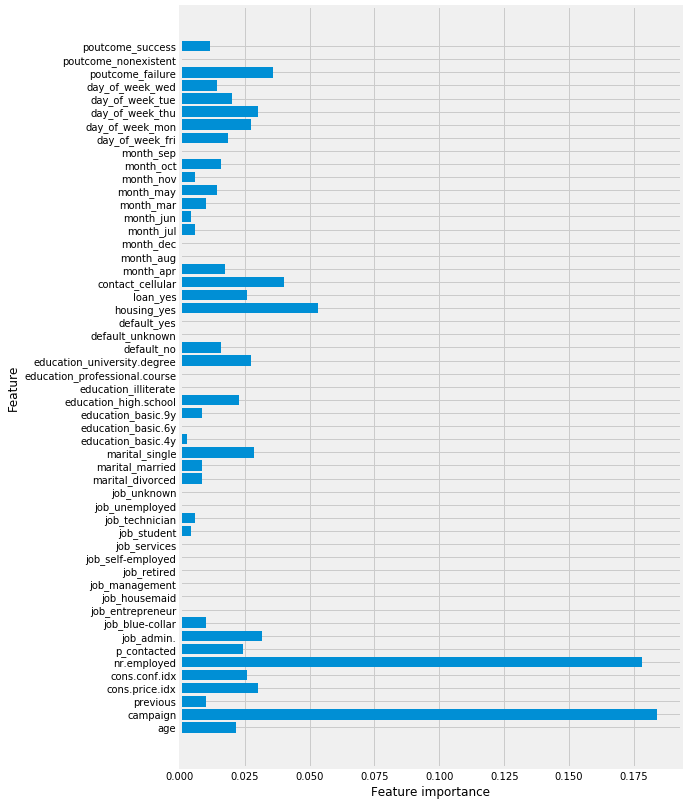

In [115]:
plot_feature_importances(xgb_clf)

**Observations:**
* While we're seeing good performance with the baseline model parameters they are not much better that what we've seen previously. Maybe we can improve with grid search
* SMOTE data seems to consistently be the best performing for our priority metrics at this point, so we will only give that a look in our grid search
* It's very interesting that this model prioritized new features, specifically the importance of 'campaign' is not the greatest, yet nr.employed is still the second most important


### XGBoost Grid Search

The parameters we will explore are: 
* **learning_rate:** Step size shrinkage used to prevent overfitting.
* **max_depth:** Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
* **min_child_weight:** Minimum sum of instance weight needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. The larger the more conservative the model is
* **subsample:** Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.

In [116]:
# Create a parameter grid to identify optimal parameters
xgb_param_grid = {
    'learning_rate': [.01, 0.1, 0.2],
    'max_depth': [3,5,7],
    'min_child_weight': [2, 4, 6],
    'subsample': [0.3, 0.5, 0.7]}

In [117]:
# fit the gridsearch to the xgb classifier and prioritize recall
xgb_gs_clf = GridSearchCV(xgb_clf, 
                          xgb_param_grid,
                          scoring='recall',
                          cv=3,
                          n_jobs=-1)

In [120]:
# fit the xgb_gs_clf model to the SMOTE data and show the results
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-XGB',
                                  data_name='SMOTE_data')


print('Best parameters: ',  xgb_gs_clf.best_params_, '\n')
print(confusion_matrix(SMOTE_data['y_test'], 
                       xgb_gs_clf.predict(SMOTE_data['X_test'])), '\n')

model_results.tail()

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.7} 

[[8839  313]
 [ 806  339]] 



model           data  train_accuracy  test_accuracy  \
27  GridSearch-forest_2     SMOTE_data           0.894          0.875   
28        XGBClassifier  original_data           0.904          0.899   
29        XGBClassifier    scaled_data           0.904          0.899   
30        XGBClassifier     SMOTE_data           0.915          0.885   
31       GridSearch-XGB     SMOTE_data           0.947          0.891   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
28      0.628   0.230     0.336  
29      0.628   0.230     0.336  
30      0.477   0.403     0.437  
31      0.520   0.296     0.377

**Observations:**
* The model may be slightly overfit, we can run it again with shallower trees to see if we can improve
* Performance otherwise is not too impressive and actually degraded in recall 

In [121]:
# Create a parameter grid to identify optimal parameters
xgb_param_grid = {
    'learning_rate': [0.1, 0.3, 0.7],
    'max_depth': [3,5],
    'min_child_weight': [1, 4, 6],
    'subsample': [0.5, 0.7]}

In [122]:
# fit the gridsearch to the xgb classifier and prioritize recall
xgb_gs_clf = GridSearchCV(xgb_clf, 
                          xgb_param_grid,
                          scoring='recall',
                          cv=3,
                          n_jobs=-1)

In [123]:
# fit the xgb_gs_clf model to the SMOTE data and show the results
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-XGB_2',
                                  data_name='SMOTE_data')


print('Best parameters: ',  xgb_gs_clf.best_params_, '\n')
print(confusion_matrix(SMOTE_data['y_test'], 
                       xgb_gs_clf.predict(SMOTE_data['X_test'])), '\n')

model_results.tail()

Best parameters:  {'learning_rate': 0.7, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.7} 

[[8819  333]
 [ 817  328]] 



model           data  train_accuracy  test_accuracy  precision  \
28     XGBClassifier  original_data           0.904          0.899      0.628   
29     XGBClassifier    scaled_data           0.904          0.899      0.628   
30     XGBClassifier     SMOTE_data           0.915          0.885      0.477   
31    GridSearch-XGB     SMOTE_data           0.947          0.891      0.520   
32  GridSearch-XGB_2     SMOTE_data           0.957          0.888      0.496   

    recall  f1_score  
28   0.230     0.336  
29   0.230     0.336  
30   0.403     0.437  
31   0.296     0.377  
32   0.286     0.363

#### XGBoost Observations

## Support Vector Machine

The SVM classifier will be the final model we try. SVM attempts to find the decision boundary which maximizes the distance between the boundary and the training observations. This model includes a parameter (C), which specifies the balance between finding this optimal boundary for most datapoints, and misclassifying observations.

In [124]:
svm_clf = SVC(gamma='auto', random_state=175)

In [125]:
# fit the svm_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=svm_clf,
                                      data=d,
                                      model_name="SVC",
                                      data_name = modeling_data1_names[i])
    print('SVC: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], svm_clf.predict(d['X_test'])), '\n')
    
model_results.tail()

SVC: original_data
[[9001  151]
 [ 909  236]] 

SVC: scaled_data
[[8989  163]
 [ 873  272]] 

SVC: SMOTE_data
[[8461  691]
 [ 622  523]] 



model           data  train_accuracy  test_accuracy  precision  \
31    GridSearch-XGB     SMOTE_data           0.947          0.891      0.520   
32  GridSearch-XGB_2     SMOTE_data           0.957          0.888      0.496   
33               SVC  original_data           0.904          0.897      0.610   
34               SVC    scaled_data           0.911          0.899      0.625   
35               SVC     SMOTE_data           0.889          0.872      0.431   

    recall  f1_score  
31   0.296     0.377  
32   0.286     0.363  
33   0.206     0.308  
34   0.238     0.344  
35   0.457     0.443

#### SVM Observations:
* SMOTE data again appears to get us the best recall and F1
* accuracy is slightly lower than previous models
* It's seems like a trend at this point that SMOTE will be getting us the best results for the metric we are prioritizing 

### SVM Grid Search

This model includes a parameter (C), which specifies the balance between finding this optimal boundary for most datapoints, and misclassifying observations.

We'll continue to only look at our SMOTE data, as that still seems to gain our best performance. 

In [126]:
# Specify the parameter grid to be used during the GridSearchCV
svm_param_grid = {'C':[1,5,10],
                'class_weight':['balanced', None]}

In [127]:
# fit the gridsearch to the tree classifier and prioritize recall
svm_gs_clf = GridSearchCV(svm_clf, 
                          svm_param_grid,
                          scoring='recall',
                          cv=3,
                          n_jobs=-1)

In [128]:
# fit the xgb_gs_clf model to the SMOTE data and show the results
model_results = add_model_results(model=svm_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-SVM',
                                  data_name='SMOTE_data')

print('Best parameters: ',  svm_gs_clf.best_params_, '\n')
print(confusion_matrix(SMOTE_data['y_test'], 
                       svm_gs_clf.predict(SMOTE_data['X_test'])), '\n')

model_results.tail()

Best parameters:  {'C': 10, 'class_weight': 'balanced'} 

[[8619  533]
 [ 767  378]] 



model           data  train_accuracy  test_accuracy  precision  \
32  GridSearch-XGB_2     SMOTE_data           0.957          0.888      0.496   
33               SVC  original_data           0.904          0.897      0.610   
34               SVC    scaled_data           0.911          0.899      0.625   
35               SVC     SMOTE_data           0.889          0.872      0.431   
36    GridSearch-SVM     SMOTE_data           0.945          0.874      0.415   

    recall  f1_score  
32   0.286     0.363  
33   0.206     0.308  
34   0.238     0.344  
35   0.457     0.443  
36   0.330     0.368

#### SVM Grid Search Observations
* Grid search appears to have lowered our priority metrics
* The gap between train and test accuracy is larger as well, suggesting that we did not tune the right parameters for this model and that it is potentially overfit 

## Principle Component Analysis

One feature selection method we failed to consider earlier is Principle Component Analysis (PCA). PCA is a method to reduce the dimensionality of the data and therefore help with overfitting and accuracy. With 53 dimensions in our data there is likely a large amount of "white space" that does not contain much information about our label data. 

By applying PCA we can reduce our dataset down to only the features that should have some influence on predicting our labels. Even though we know now that SMOTE seems to be our best choice for this analysis, let's try in with the scaled data as well to practice and learn. 

In [129]:
# Apply PCA to the scaled (unbalanced) dataset

# Create counter variables to identify the optimal number of components to use
# in order to explain at least 99% of the variance

components = 0
explained_variance = 0

# Use a while loop to incrementally add a component, and calculate the explained variance for
# this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

# Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the original (unbalanced) dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original (unbalanced) dataset" )

Use  43  for PCA Dimension Reduction in the original (unbalanced) dataset
This explains  99.36 % of the variance in the original (unbalanced) dataset


In [130]:
# Apply the transformation to the test data for the original (unbalanced) dataset 
X_test_pca = pca.transform(scaled_data_test)

In [131]:
# create a dictionary with the pca train test data
pca_data = {'X_train': X_train_pca, 'y_train':y_train,
              'X_test': X_test_pca, 'y_test':y_test}

In [132]:
# Apply PCA to the SMOTE dataset

# Create counter variables to identify the optimal number of components to use
# in order to explain at least 99% of the variance

components = 0
explained_variance = 0

# Use a while loop to incrementally add a component, and calculate the explained variance for
# this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_SMOTE_pca = pca.fit_transform(X_train_resampled)
    explained_variance = sum(pca.explained_variance_ratio_)
    

# Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the SMOTE dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the SMOTE dataset" )

Use  43  for PCA Dimension Reduction in the SMOTE dataset
This explains  99.19 % of the variance in the SMOTE dataset


In [133]:
# Apply the SMOTE transformation to the test data for the scaled dataset 
X_test_SMOTE_pca = pca.transform(scaled_data_test)

In [134]:
# create a dictionary for the SMOTE pca train and test data
SMOTE_pca_data = {'X_train': X_train_SMOTE_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_SMOTE_pca, 'y_test':y_test}

### PCA Observations and Next Steps
* PCA selected the same number of features for each set - **43** - reducing the dimensionality of our original data by 10
* To see which models we want to try again, let's see what has performed best so far

In [135]:
# create a copy of our model results dataframe to sort on different metrics
sorted_model_results = model_results.copy()

#### Best Models - Pre-PCA

In [136]:
# sort the model dataframe by recall and show the top 5
recall_model_results = sorted_model_results.sort_values(by='recall',
                                                          ascending=False)
recall_model_results.head(5)

model           data  train_accuracy  test_accuracy  \
2       LogisticRegression     SMOTE_data           0.742          0.809   
5        GridSearch-logreg     SMOTE_data           0.742          0.809   
4        GridSearch-logreg    scaled_data           0.825          0.821   
3        GridSearch-logreg  original_data           0.824          0.822   
21  RandomForestClassifier     SMOTE_data           0.788          0.842   

    precision  recall  f1_score  
2       0.317   0.624     0.421  
5       0.317   0.624     0.421  
4       0.333   0.608     0.431  
3       0.333   0.594     0.427  
21      0.368   0.583     0.451

In [137]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

model        data  train_accuracy  test_accuracy  \
27     GridSearch-forest_2  SMOTE_data           0.894          0.875   
24       GridSearch-forest  SMOTE_data           0.901          0.875   
18       GridSearch-tree_2  SMOTE_data           0.850          0.866   
21  RandomForestClassifier  SMOTE_data           0.788          0.842   
12  DecisionTreeClassifier  SMOTE_data           0.796          0.850   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
24      0.448   0.521     0.482  
18      0.415   0.493     0.451  
21      0.368   0.583     0.451  
12      0.379   0.552     0.449

In [138]:
accuracy_model_results = sorted_model_results.sort_values(by='test_accuracy',
                                                    ascending=False)
accuracy_model_results.head()

model           data  train_accuracy  test_accuracy  \
1       LogisticRegression    scaled_data           0.901          0.901   
0       LogisticRegression  original_data           0.900          0.900   
20  RandomForestClassifier    scaled_data           0.899          0.900   
19  RandomForestClassifier  original_data           0.899          0.900   
25     GridSearch-forest_2  original_data           0.910          0.900   

    precision  recall  f1_score  
1       0.652   0.239     0.350  
0       0.633   0.244     0.352  
20      0.686   0.179     0.284  
19      0.688   0.181     0.286  
25      0.637   0.231     0.340

**Observations:**
* It appears that our best models are: 
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * XGBoost
* We will try all of these models with their baseline parameters 

### PCA Models

In [139]:
# reset baseline models
tree_clf = DecisionTreeClassifier(criterion= 'gini', 
                                  max_depth= 7, 
                                  min_samples_split= 50,
                                  random_state=175)

forest = RandomForestClassifier(criterion= 'gini',
                                max_depth= 12,
                                min_samples_leaf= 3, 
                                min_samples_split= 5, 
                                n_estimators= 100,
                                random_state=175)

logreg = LogisticRegression(solver='lbfgs',
                            max_iter=1000,
                            random_state=175)

xgb_clf = XGBClassifier()

In [140]:
# create a list of models and model names to iterate through 
models = [tree_clf, forest, xgb_clf, logreg]
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier',
               'XGBClassifier', 'LogisticRegression']

In [141]:
# iterate through all the models with the scaled pca data and show results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=pca_data,
                                      model_name=model_names[i], 
                                      data_name='pca_data')

    print(model_names[i], ' pca_data')
    print(confusion_matrix(pca_data['y_test'], 
                           m.predict(pca_data['X_test'])), '\n')

    
model_results.tail()

DecisionTreeClassifier  pca_data
[[8968  184]
 [ 886  259]] 

RandomForestClassifier  pca_data
[[9001  151]
 [ 890  255]] 

XGBClassifier  pca_data
[[9001  151]
 [ 885  260]] 

LogisticRegression  pca_data
[[9010  142]
 [ 877  268]] 



model        data  train_accuracy  test_accuracy  \
36          GridSearch-SVM  SMOTE_data           0.945          0.874   
37  DecisionTreeClassifier    pca_data           0.909          0.896   
38  RandomForestClassifier    pca_data           0.932          0.899   
39           XGBClassifier    pca_data           0.906          0.899   
40      LogisticRegression    pca_data           0.900          0.901   

    precision  recall  f1_score  
36      0.415   0.330     0.368  
37      0.585   0.226     0.326  
38      0.628   0.223     0.329  
39      0.633   0.227     0.334  
40      0.654   0.234     0.345

**Observations:**
* Relatively low recall and F1, but good accuracy, similar to what we've seen with scaled data previously

In [142]:
# iterate through all the models with the SMOTE pca data and show results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=SMOTE_pca_data,
                                      model_name=model_names[i], 
                                      data_name='SMOTE_pca_data')

    print(model_names[i], ' SMOTE_pca_data')
    print(confusion_matrix(SMOTE_pca_data['y_test'], 
                           m.predict(SMOTE_pca_data['X_test'])), '\n')

    
model_results.tail()

DecisionTreeClassifier  SMOTE_pca_data
[[7676 1476]
 [ 469  676]] 

RandomForestClassifier  SMOTE_pca_data
[[8118 1034]
 [ 485  660]] 

XGBClassifier  SMOTE_pca_data
[[7817 1335]
 [ 459  686]] 

LogisticRegression  SMOTE_pca_data
[[7590 1562]
 [ 427  718]] 



model            data  train_accuracy  test_accuracy  \
40      LogisticRegression        pca_data           0.900          0.901   
41  DecisionTreeClassifier  SMOTE_pca_data           0.762          0.811   
42  RandomForestClassifier  SMOTE_pca_data           0.811          0.852   
43           XGBClassifier  SMOTE_pca_data           0.778          0.826   
44      LogisticRegression  SMOTE_pca_data           0.743          0.807   

    precision  recall  f1_score  
40      0.654   0.234     0.345  
41      0.314   0.590     0.410  
42      0.390   0.576     0.465  
43      0.339   0.599     0.433  
44      0.315   0.627     0.419

#### PCA Model Observations
* **Logistic Regression** with the **SMOTE PCA** data has given us the **highest recall** score so far at **.629**
    * This model has predicted the **largest number of True Positives: 720** and the **smallest number of False Negatives: 425**
    * Despite the accuracy of this model being relatively low, it appears to have given us the best results for our priority metric
* The **Random Forest** classifier has given us a the most balanced scores, with **F1 of .468** 
    * We will need determine the **cost of a False Positive** to determine where we break even
    * This model is generally more accurate, but only by a few points, but if the cost of pursing a false positive is high then we mat want to pursue developing this mode further

In [159]:
sorted_model_results = model_results.copy()
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

model              data  train_accuracy  test_accuracy  \
27     GridSearch-forest_2        SMOTE_data           0.894          0.875   
24       GridSearch-forest        SMOTE_data           0.901          0.875   
42  RandomForestClassifier    SMOTE_pca_data           0.811          0.852   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   
21  RandomForestClassifier        SMOTE_data           0.788          0.842   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
24      0.448   0.521     0.482  
42      0.390   0.576     0.465  
50      0.460   0.465     0.462  
21      0.368   0.583     0.451

In [160]:
recall_model_results = sorted_model_results.sort_values(by='recall',
                                                          ascending=False)
recall_model_results.head()

model              data  train_accuracy  test_accuracy  \
44  LogisticRegression    SMOTE_pca_data           0.743          0.807   
5    GridSearch-logreg        SMOTE_data           0.742          0.809   
2   LogisticRegression        SMOTE_data           0.742          0.809   
52  LogisticRegression  final_SMOTE_data           0.750          0.827   
4    GridSearch-logreg       scaled_data           0.825          0.821   

    precision  recall  f1_score  
44      0.315   0.627     0.419  
5       0.317   0.624     0.421  
2       0.317   0.624     0.421  
52      0.345   0.615     0.442  
4       0.333   0.608     0.431

## Adding Data Back In

In our data transformation section we removed some data that may have in fact turned out to be helpful, and we chose to keep some one-hot encoded variables when we could have dropped them. Since it appears that we still have some room for improvement let's add that data back in and see it we can get any better results with the models we've prioritized. 

In [145]:
# one-hot encode the original data again
full_data = pd.get_dummies(data, drop_first=True)
full_data.head()

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   
2   37         1         0           1.1          93.994          -36.4   
3   40         1         0           1.1          93.994          -36.4   
4   56         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  p_contacted  job_blue-collar  job_entrepreneur  \
0      4.857       5191.0            0                0                 0   
1      4.857       5191.0            0                0                 0   
2      4.857       5191.0            0                0                 0   
3      4.857       5191.0            0                0                 0   
4      4.857       5191.0            0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   marital_married  marital_single  education_basic.6y  education_basic.9y  \
0                1               0                   0                   0   
1                1               0                   0                   0   
2                1               0                   0                   0   
3                1               0                   1                   0   
4                1               0                   0                   0   

   education_high.school  education_illiterate  education_professional.course  \
0                      0                     0                              0   
1                      1                     0                              0   
2                      1                     0                              0   
3                      0                     0                              0   
4                      1                     0                              0   

   education_university.degree  default_unknown  default_yes  housing_yes  \
0                            0                0            0            0   
1                            0                1            0            0   
2                            0                0            0            1   
3                            0                0            0            0   
4                            0                0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0         

In [146]:
full_data.shape

(41188, 49)

We know that SMOTE had a significant impact on model performance, but scaling did not, so we can skip scaling until we get back to PCA.

In [147]:
# split our data into target and variable and perform train-test split
target = full_data.y_yes
variables = full_data.drop(columns=['y_yes'])

X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

final_data = {'X_train': X_train, 'y_train':y_train,
              'X_test': X_test, 'y_test':y_test}

In [148]:
# iterate through our models and record results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_data,
                                      model_name=model_names[i], 
                                      data_name='final_data')

    print(model_names[i], ' final_data')
    print(confusion_matrix(final_data['y_test'], 
                           m.predict(final_data['X_test'])), '\n')
    

model_results.tail()

DecisionTreeClassifier  final_data
[[8958  194]
 [ 842  303]] 

RandomForestClassifier  final_data
[[8981  171]
 [ 873  272]] 

XGBClassifier  final_data
[[8991  161]
 [ 860  285]] 

LogisticRegression  final_data
[[9007  145]
 [ 900  245]] 



model            data  train_accuracy  test_accuracy  \
44      LogisticRegression  SMOTE_pca_data           0.743          0.807   
45  DecisionTreeClassifier      final_data           0.906          0.899   
46  RandomForestClassifier      final_data           0.916          0.899   
47           XGBClassifier      final_data           0.905          0.901   
48      LogisticRegression      final_data           0.899          0.899   

    precision  recall  f1_score  
44      0.315   0.627     0.419  
45      0.610   0.265     0.369  
46      0.614   0.238     0.343  
47      0.639   0.249     0.358  
48      0.628   0.214     0.319

These models are not performing better than our previous models at this point, but they also haven't gone through the benefit of greater transformations (like SMOTE) and series of grid search. Nevertheless it will be interesting to see how they might be treating the data differently

In [149]:
# reformat the plot_feature_importances function to accept a range of feature lengths
def plot_feature_importances(model, data=X_train):
    n_features = data.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

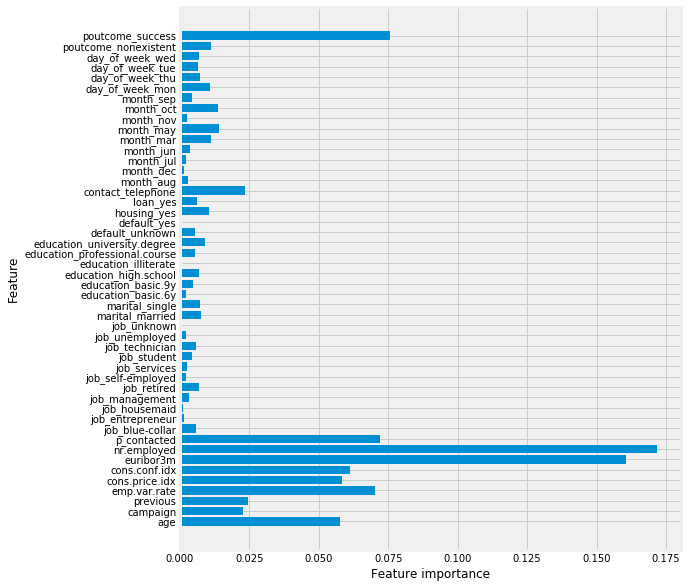

In [150]:
plot_feature_importances(forest)

Some of the features we added back in (e.g., **euirbor.3m**) have proved to be important, but it's also not too surprising as we knew it was highly correlated with nr.employed.

In [151]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

model            data  train_accuracy  test_accuracy  \
27     GridSearch-forest_2      SMOTE_data           0.894          0.875   
24       GridSearch-forest      SMOTE_data           0.901          0.875   
42  RandomForestClassifier  SMOTE_pca_data           0.811          0.852   
21  RandomForestClassifier      SMOTE_data           0.788          0.842   
18       GridSearch-tree_2      SMOTE_data           0.850          0.866   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
24      0.448   0.521     0.482  
42      0.390   0.576     0.465  
21      0.368   0.583     0.451  
18      0.415   0.493     0.451

In [152]:
recall_model_results = sorted_model_results.sort_values(by='recall',
                                                          ascending=False)
recall_model_results.head()

model            data  train_accuracy  test_accuracy  \
44  LogisticRegression  SMOTE_pca_data           0.743          0.807   
2   LogisticRegression      SMOTE_data           0.742          0.809   
5    GridSearch-logreg      SMOTE_data           0.742          0.809   
4    GridSearch-logreg     scaled_data           0.825          0.821   
43       XGBClassifier  SMOTE_pca_data           0.778          0.826   

    precision  recall  f1_score  
44      0.315   0.627     0.419  
2       0.317   0.624     0.421  
5       0.317   0.624     0.421  
4       0.333   0.608     0.431  
43      0.339   0.599     0.433

### Final Data SMOTE and Scale

We will apply SMOTE since that has been giving us the best results and helps mitigate our class imbalance issue, and will scale the data as well in order to apply PCA

In [153]:
# apply SMOTE to our final_data training data
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [154]:
# convert to a dataframe
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns=X_train.columns.values)
X_train_resampled.head(2)

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  45.0       1.0       0.0           1.4          93.444          -36.1   
1  33.0       1.0       0.0           1.4          93.918          -42.7   

   euribor3m  nr.employed  p_contacted  job_blue-collar  job_entrepreneur  \
0      4.966       5228.1          0.0              0.0               0.0   
1      4.962       5228.1          0.0              0.0               0.0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0            0.0             0.0          0.0                0.0   
1            0.0             0.0          0.0                0.0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0           0.0          0.0             1.0             0.0          0.0   
1           0.0          0.0             1.0             0.0          0.0   

   marital_married  marital_single  education_basic.6y  education_basic.9y  \
0              1.0             0.0                 0.0                 0.0   
1              0.0             1.0                 0.0                 0.0   

   education_high.school  education_illiterate  education_professional.course  \
0                    0.0                   0.0                            1.0   
1                    1.0                   0.0                            0.0   

   education_university.degree  default_unknown  default_yes  housing_yes  \
0                          0.0              0.0          0.0          0.0   
1                          0.0              0.0          0.0          1.0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0       0.0                0.0        1.0        0.0        0.0        0.0   
1       0.0                0.0        0.0        0.0        1.0        0.0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0        0.0        0.0        0.0        0.0        0.0              0.0   
1        0.0        0.0        0.0        0.0        0.0              0.0   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0              0.0              1.0              0.0                   1.0   
1              1.0              0.0              0.0                   1.0   

   poutcome_success  
0               0.0  
1               0.0

In [155]:
# apply the StandardScaler to the SMOTE final data
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

In [156]:
# store the train and test data in a dictionary
final_SMOTE_data = {'X_train': scaled_data_train, 'y_train':y_train_resampled,
                    'X_test': scaled_data_test, 'y_test':y_test}

In [157]:
# iterate through our models and record results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_SMOTE_data,
                                      model_name=model_names[i], 
                                      data_name='final_SMOTE_data')
    
    print(model_names[i], ' final_SMOTE_data')
    print(confusion_matrix(final_SMOTE_data['y_test'], 
                           m.predict(final_SMOTE_data['X_test'])), '\n')
    
model_results.tail(10)

DecisionTreeClassifier  final_SMOTE_data
[[8599  553]
 [ 691  454]] 

RandomForestClassifier  final_SMOTE_data
[[8528  624]
 [ 613  532]] 

XGBClassifier  final_SMOTE_data
[[8768  384]
 [ 731  414]] 

LogisticRegression  final_SMOTE_data
[[7816 1336]
 [ 441  704]] 



model              data  train_accuracy  test_accuracy  \
43           XGBClassifier    SMOTE_pca_data           0.778          0.826   
44      LogisticRegression    SMOTE_pca_data           0.743          0.807   
45  DecisionTreeClassifier        final_data           0.906          0.899   
46  RandomForestClassifier        final_data           0.916          0.899   
47           XGBClassifier        final_data           0.905          0.901   
48      LogisticRegression        final_data           0.899          0.899   
49  DecisionTreeClassifier  final_SMOTE_data           0.828          0.879   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   
51           XGBClassifier  final_SMOTE_data           0.930          0.892   
52      LogisticRegression  final_SMOTE_data           0.750          0.827   

    precision  recall  f1_score  
43      0.339   0.599     0.433  
44      0.315   0.627     0.419  
45      0.610   0.265     0.369  
46      0.614   0.238     0.343  
47      0.639   0.249     0.358  
48      0.628   0.214     0.319  
49      0.451   0.397     0.422  
50      0.460   0.465     0.462  
51      0.519   0.362     0.426  
52      0.345   0.615     0.442

In [158]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by='recall',
                                                    ascending=False)
f1_model_results.head()

model              data  train_accuracy  test_accuracy  \
44  LogisticRegression    SMOTE_pca_data           0.743          0.807   
5    GridSearch-logreg        SMOTE_data           0.742          0.809   
2   LogisticRegression        SMOTE_data           0.742          0.809   
52  LogisticRegression  final_SMOTE_data           0.750          0.827   
4    GridSearch-logreg       scaled_data           0.825          0.821   

    precision  recall  f1_score  
44      0.315   0.627     0.419  
5       0.317   0.624     0.421  
2       0.317   0.624     0.421  
52      0.345   0.615     0.442  
4       0.333   0.608     0.431

### PCA - Again

In [161]:
## Apply PCA to the final_SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(final_SMOTE_data['X_train'])
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the full  dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original full dataset" )

Use  42  for PCA Dimension Reduction in the full  dataset
This explains  99.32 % of the variance in the original full dataset


In [162]:
## Apply the transformation to the test data for the full dataset 
X_test_pca = pca.transform(final_SMOTE_data['X_test'])

In [163]:
final_pca_data = {'X_train': X_train_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_pca, 'y_test':y_test}

In [164]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_pca_data,
                                      model_name=model_names[i], 
                                      data_name='final_pca_data')
model_results.tail(10)

model              data  train_accuracy  test_accuracy  \
47           XGBClassifier        final_data           0.905          0.901   
48      LogisticRegression        final_data           0.899          0.899   
49  DecisionTreeClassifier  final_SMOTE_data           0.828          0.879   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   
51           XGBClassifier  final_SMOTE_data           0.930          0.892   
52      LogisticRegression  final_SMOTE_data           0.750          0.827   
53  DecisionTreeClassifier    final_pca_data           0.781          0.818   
54  RandomForestClassifier    final_pca_data           0.834          0.857   
55           XGBClassifier    final_pca_data           0.807          0.842   
56      LogisticRegression    final_pca_data           0.747          0.818   

    precision  recall  f1_score  
47      0.639   0.249     0.358  
48      0.628   0.214     0.319  
49      0.451   0.397     0.422  
50      0.460   0.465     0.462  
51      0.519   0.362     0.426  
52      0.345   0.615     0.442  
53      0.318   0.559     0.405  
54      0.401   0.571     0.471  
55      0.366   0.581     0.449  
56      0.330   0.616     0.430

In [165]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by='recall',
                                                    ascending=False)
f1_model_results.head()

model              data  train_accuracy  test_accuracy  \
44  LogisticRegression    SMOTE_pca_data           0.743          0.807   
2   LogisticRegression        SMOTE_data           0.742          0.809   
5    GridSearch-logreg        SMOTE_data           0.742          0.809   
56  LogisticRegression    final_pca_data           0.747          0.818   
52  LogisticRegression  final_SMOTE_data           0.750          0.827   

    precision  recall  f1_score  
44      0.315   0.627     0.419  
2       0.317   0.624     0.421  
5       0.317   0.624     0.421  
56      0.330   0.616     0.430  
52      0.345   0.615     0.442

In [166]:
sorted_model_results.sort_values(by='f1_score', ascending=False).head()

model              data  train_accuracy  test_accuracy  \
27     GridSearch-forest_2        SMOTE_data           0.894          0.875   
24       GridSearch-forest        SMOTE_data           0.901          0.875   
54  RandomForestClassifier    final_pca_data           0.834          0.857   
42  RandomForestClassifier    SMOTE_pca_data           0.811          0.852   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
24      0.448   0.521     0.482  
54      0.401   0.571     0.471  
42      0.390   0.576     0.465  
50      0.460   0.465     0.462

In [168]:
forest_param_grid = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9],
    'min_samples_split': [5, 10, 25],
    'min_samples_leaf': [3, 6, 12]}

In [169]:
# Instantiate GridSearchCV, with scoring set to recall
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3,
                         scoring='recall',
                         n_jobs=-1)

In [170]:
model_results = add_model_results(model=forest_gs, 
                                      data=final_pca_data,
                                      model_name='GridSearchCV-forest', 
                                      data_name='final_pca_data')

    
print('GridSearchCV-forest: final_pca_data')
print('Best parameters: ',  svm_gs_clf.best_params_, '\n')
print(confusion_matrix(final_pca_data['y_test'], 
                       forest_gs.predict(final_pca_data['X_test'])), '\n')    

model_results.tail(10)

GridSearchCV-forest: final_pca_data
Best parameters:  {'C': 10, 'class_weight': 'balanced'} 

[[8040 1112]
 [ 471  674]] 



model              data  train_accuracy  test_accuracy  \
48      LogisticRegression        final_data           0.899          0.899   
49  DecisionTreeClassifier  final_SMOTE_data           0.828          0.879   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   
51           XGBClassifier  final_SMOTE_data           0.930          0.892   
52      LogisticRegression  final_SMOTE_data           0.750          0.827   
53  DecisionTreeClassifier    final_pca_data           0.781          0.818   
54  RandomForestClassifier    final_pca_data           0.834          0.857   
55           XGBClassifier    final_pca_data           0.807          0.842   
56      LogisticRegression    final_pca_data           0.747          0.818   
57     GridSearchCV-forest    final_pca_data           0.790          0.846   

    precision  recall  f1_score  
48      0.628   0.214     0.319  
49      0.451   0.397     0.422  
50      0.460   0.465     0.462  
51      0.519   0.362     0.426  
52      0.345   0.615     0.442  
53      0.318   0.559     0.405  
54      0.401   0.571     0.471  
55      0.366   0.581     0.449  
56      0.330   0.616     0.430  
57      0.377   0.589     0.460

## Taking Data Back Out 

We've added data back in, and it produced some good scores, but it hasn't topped our best scores so far. The last thing we can do is try to **reduce overfitting** and **improve performance** by taking some data back out. We know that not all of our features are very important, so let's try removing some like **job, education, and month**.

In [171]:
full_data.columns.values

array(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'p_contacted',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'], dtype=object)

In [172]:
# create a list of all the columns we'd like to drop and create a new frame to wrok with
jobs = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown']

education = ['education_basic.6y', 'education_basic.9y',
             'education_high.school', 'education_illiterate',
             'education_professional.course', 'education_university.degree']

months = ['month_aug', 'month_dec', 'month_jul',
          'month_jun', 'month_mar', 'month_may', 
          'month_nov', 'month_oct', 'month_sep',]

drops = jobs + education + months

last_data = full_data.drop(columns=drops).copy()
last_data.head(2)

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  p_contacted  marital_married  marital_single  \
0      4.857       5191.0            0                1               0   
1      4.857       5191.0            0                1               0   

   default_unknown  default_yes  housing_yes  loan_yes  contact_telephone  \
0                0            0            0         0                  1   
1                1            0            0         0                  1   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1                0                0                0   
1                1                0                0                0   

   poutcome_nonexistent  poutcome_success  y_yes  
0                     1                 0      0  
1                     1                 0      0

In [173]:
last_data.shape

(41188, 23)

So now we are only working with 23 parameters. This should have a positive effect on fit for our models

In [174]:
# break out our label data and features, do train-test split
target = last_data.y_yes
variables = last_data.drop(columns=['y_yes'])

X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [175]:
# applt SMOTE
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [176]:
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns= variables.columns.values)

In [177]:
# put our new data minus all that categorical data into a new dict
drop_cats_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
                  'X_test': X_test, 'y_test':y_test}

### Cat Drop Models

In [178]:
# iterate through our models again
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=drop_cats_data,
                                      model_name=model_names[i], 
                                      data_name='drop_cats_data')

    print(model_names[i], ' drop_cats_data')
    print(confusion_matrix(drop_cats_data['y_test'], 
                           m.predict(drop_cats_data['X_test'])), '\n')    

model_results.tail(10)

DecisionTreeClassifier  drop_cats_data
[[8563  589]
 [ 659  486]] 

RandomForestClassifier  drop_cats_data
[[8591  561]
 [ 647  498]] 

XGBClassifier  drop_cats_data
[[8746  406]
 [ 723  422]] 

LogisticRegression  drop_cats_data
[[7192 1960]
 [ 394  751]] 



model              data  train_accuracy  test_accuracy  \
52      LogisticRegression  final_SMOTE_data           0.750          0.827   
53  DecisionTreeClassifier    final_pca_data           0.781          0.818   
54  RandomForestClassifier    final_pca_data           0.834          0.857   
55           XGBClassifier    final_pca_data           0.807          0.842   
56      LogisticRegression    final_pca_data           0.747          0.818   
57     GridSearchCV-forest    final_pca_data           0.790          0.846   
58  DecisionTreeClassifier    drop_cats_data           0.830          0.879   
59  RandomForestClassifier    drop_cats_data           0.926          0.883   
60           XGBClassifier    drop_cats_data           0.922          0.890   
61      LogisticRegression    drop_cats_data           0.735          0.771   

    precision  recall  f1_score  
52      0.345   0.615     0.442  
53      0.318   0.559     0.405  
54      0.401   0.571     0.471  
55      0.366   0.581     0.449  
56      0.330   0.616     0.430  
57      0.377   0.589     0.460  
58      0.452   0.424     0.438  
59      0.470   0.435     0.452  
60      0.510   0.369     0.428  
61      0.277   0.656     0.390

In [210]:
sorted_model_results = model_results.copy()

sorted_model_results.sort_values(by=['f1_score'],ascending=False).head()

model              data  train_accuracy  test_accuracy  \
27     GridSearch-forest_2        SMOTE_data           0.894          0.875   
24       GridSearch-forest        SMOTE_data           0.901          0.875   
54  RandomForestClassifier    final_pca_data           0.834          0.857   
42  RandomForestClassifier    SMOTE_pca_data           0.811          0.852   
50  RandomForestClassifier  final_SMOTE_data           0.931          0.880   

    precision  recall  f1_score  
27      0.448   0.530     0.486  
24      0.448   0.521     0.482  
54      0.401   0.571     0.471  
42      0.390   0.576     0.465  
50      0.460   0.465     0.462

In [211]:
recall_results = sorted_model_results.sort_values(by=['recall'], ascending=False)
recall_results.head()

model            data  train_accuracy  test_accuracy  \
61  LogisticRegression  drop_cats_data           0.735          0.771   
44  LogisticRegression  SMOTE_pca_data           0.743          0.807   
2   LogisticRegression      SMOTE_data           0.742          0.809   
5    GridSearch-logreg      SMOTE_data           0.742          0.809   
56  LogisticRegression  final_pca_data           0.747          0.818   

    precision  recall  f1_score  
61      0.277   0.656     0.390  
44      0.315   0.627     0.419  
2       0.317   0.624     0.421  
5       0.317   0.624     0.421  
56      0.330   0.616     0.430

# Conclusions and Next Steps

In this section we work though selecting and applying a model to our business problem of predicting which customers are most likely 

In [220]:
recall_results.reset_index(drop=True, inplace=True)
recall_results.head()

model            data  train_accuracy  test_accuracy  \
0  LogisticRegression  drop_cats_data           0.735          0.771   
1  LogisticRegression  SMOTE_pca_data           0.743          0.807   
2  LogisticRegression      SMOTE_data           0.742          0.809   
3   GridSearch-logreg      SMOTE_data           0.742          0.809   
4  LogisticRegression  final_pca_data           0.747          0.818   

   precision  recall  f1_score  
0      0.277   0.656     0.390  
1      0.315   0.627     0.419  
2      0.317   0.624     0.421  
3      0.317   0.624     0.421  
4      0.330   0.616     0.430

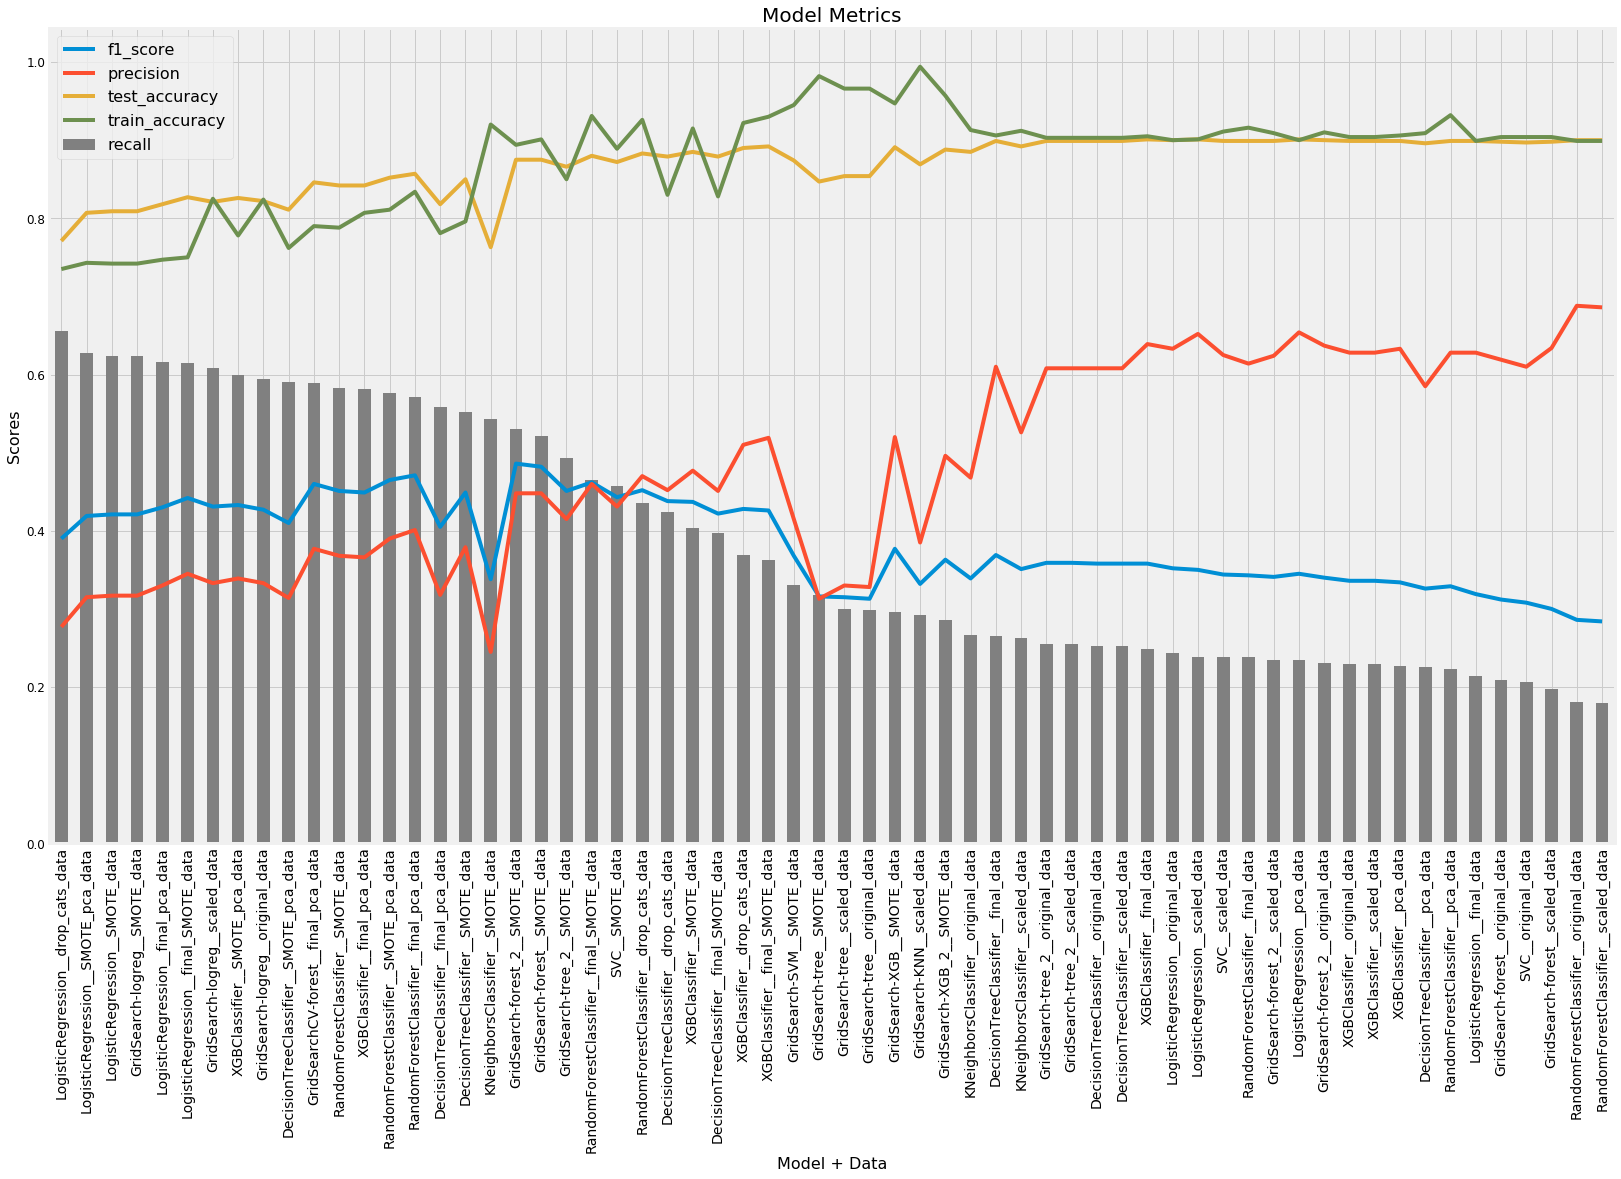

In [241]:
plt.figure(figsize=(25, 15))
ax = recall_results.recall.plot(kind='bar', color='grey')
ax = recall_results.f1_score.plot()
ax = recall_results.precision.plot()
ax = recall_results.test_accuracy.plot()
ax = recall_results.train_accuracy.plot()
ax.set_xticks(recall_results.index)
ax.set_xticklabels(recall_results.model + '__' + recall_results.data, 
                   rotation=90, fontsize=14)
ax.legend(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Model Metrics', fontsize=20)
plt.xlabel('Model + Data', fontsize=16)
plt.ylabel('Scores', fontsize=16);

In [432]:
logreg_cm = confusion_matrix(drop_cats_data['y_test'], 
                             logreg.predict(drop_cats_data['X_test']))
print(logreg_cm)

recall_results.head(1)

[[7192 1960]
 [ 394  751]]


model            data  train_accuracy  test_accuracy  \
0  LogisticRegression  drop_cats_data           0.735          0.771   

   precision  recall  f1_score  
0      0.277   0.656      0.39

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.769


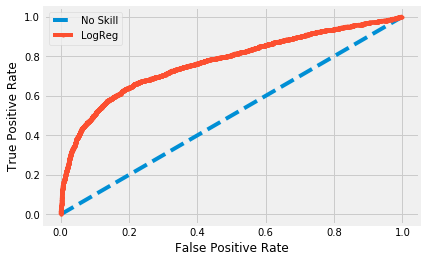

In [501]:
ns_probs = [0 for _ in range(len(drop_cats_data['y_test']))]

logreg_probs = logreg.predict_proba(drop_cats_data['X_test'])

logreg_probs = logreg_probs[:,1]

ns_auc = roc_auc_score(drop_cats_data['y_test'], ns_probs)
lr_auc = roc_auc_score(drop_cats_data['y_test'], logreg_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(drop_cats_data['y_test'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(drop_cats_data['y_test'], logreg_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [505]:
from sklearn.metrics import precision_recall_curve

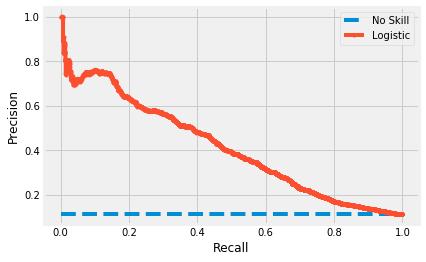

In [508]:
# predict class values
yhat = logreg.predict(drop_cats_data['X_test'])
y_test = drop_cats_data['y_test']

lr_precision, lr_recall, _ = precision_recall_curve(y_test,
                                                    logreg_probs)

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [435]:
# re-establish the forest model with the best performing parameters for F1
forest = RandomForestClassifier(criterion='gini', 
                                max_depth=12, 
                                min_samples_leaf= 3,
                                min_samples_split= 25,
                                n_estimators= 100 )

forest.fit(SMOTE_data['X_train'], SMOTE_data['y_train'])

forest_cm = confusion_matrix(SMOTE_data['y_test'], 
                             forest.predict(SMOTE_data['X_test']))

print(forest_cm)

sorted_model_results.sort_values(by=['f1_score'],ascending=False).head(1)

[[8389  763]
 [ 539  606]]


model        data  train_accuracy  test_accuracy  precision  \
27  GridSearch-forest_2  SMOTE_data           0.894          0.875      0.448   

    recall  f1_score  
27    0.53     0.486

No Skill: ROC AUC=0.500
Forest: ROC AUC=0.782


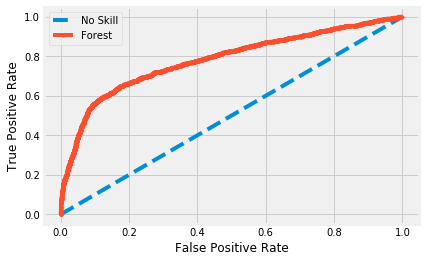

In [503]:
ns_probs = [0 for _ in range(len(SMOTE_data['y_test']))]

forest_probs = forest.predict_proba(SMOTE_data['X_test'])

forest_probs = forest_probs[:,1]

ns_auc = roc_auc_score(SMOTE_data['y_test'], ns_probs)
rf_auc = roc_auc_score(SMOTE_data['y_test'], forest_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(SMOTE_data['y_test'], ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(SMOTE_data['y_test'], forest_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

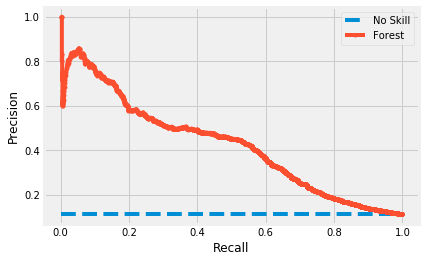

In [509]:
# predict class values
yhat = forest.predict(SMOTE_data['X_test'])
y_test = SMOTE_data['y_test']

rf_precision, rf_recall, _ = precision_recall_curve(y_test,
                                                    forest_probs)

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Average Checking Customer Revenue and Telemarketing costs

In order to determine the potential gain per new client acquired we need to make an assumption about how much revenue we can gain per customer. According to one article on bankdirector.com, we can expect roughly **$1,650** per checking customer per year. 

https://www.bankdirector.com/issues/the-profitability-of-the-average-checking-account/

According to the website costowl.com, the average telemarketing cost is **\$25** to **\$50** per hour. We'll need to make more assumptions to come up with the cost of our campaigns 

https://www.costowl.com/b2b/marketing-telemarketing-services-cost.html

The average outbound call center sales person will make 10 calls an hour, or **6min** per call

https://www.prosalesconnection.com/blog/2011/07/06/how-many-cold-calls-per-hour-should-i-make

Let's start by figuring out how many calls we would make in a campaign.

In [438]:
# print the average number of calls per customer, and avg call per successful/unsuccessful customers

avg_n_call = round(data.campaign.mean(), 0)
avg_n_yes_call = round(data[data["y"] == "yes"].campaign.mean(), 0)
avg_n_no_call = round(data[data["y"] == "no"].campaign.mean(), 0)

print(f'The average number of times a custmer was called was: {avg_n_call}')
print(f'The average calls for a succesful customer were: {avg_n_yes_call}')
print(f'The average calls for an unsuccesful customer were: {avg_n_no_call}')

The average number of times a custmer was called was: 3.0
The average calls for a succesful customer were: 2.0
The average calls for an unsuccesful customer were: 3.0


Overall, this seems pretty efficient, Only one extra call was made per unsuccessful customer. However, given that our original success rate was only 11%, that's a lot of extra calls! Let's see how many that would be assuming a campaign that attempted to reach 200,000 people. 

We'll create a quick function to help us figure this out.

In [477]:
# with a given number of customers, determine the total calls made and
# the share of those calls that are successful and unsuccessful
def n_calls_made(n_customers, success_rate=.11, yes_calls=2, no_calls=3, show= True): 
    yes_customers = n_customers * success_rate
    no_customers = n_customers - yes_customers
    
    total_yes_calls = yes_customers * yes_calls
    total_no_calls = no_customers * no_calls
    all_calls = total_yes_calls + total_no_calls
    
    y_call_share = round(total_yes_calls/all_calls, 3)
    n_call_share = 1 - y_call_share
    
    
    if show == True: 
        print(f'Given a {success_rate*100}% success rate:')
        print(f'\t * {total_yes_calls} calls would be made to succesful customers')
        print(f'\t * this represents {y_call_share*100}% of all calls \n')
        print(f'\t * {total_no_calls} calls would be made to unsuccesful customers')
        print(f'\t * this represents {n_call_share*100}% of all calls \n')

    return y_call_share, n_call_share, all_calls

In [510]:
# estimate the number of calls made based on our observed data
n_customers = 200000
n_calls_made(n_customers)

Given a 11.0% success rate:
	 * 44000.0 calls would be made to succesful customers
	 * this represents 7.6% of all calls 

	 * 534000.0 calls would be made to unsuccesful customers
	 * this represents 92.4% of all calls 



(0.076, 0.924, 578000.0)

**Observations:**
* Based on our current observations we would make **578,000** calls to customers in a 200,000 person campaign
* Only **7.6%** if of those calls would be toward successful customers
* **92.4%** of calls would go toward unproductive customers

This seems like a lot of wasted effort. One application of our model may be to determine **which customers should not receive a repeat call**. 

Let's see what it would look like if we could determine which customers were unlikely to subscribe and therefore **only received 1 call** 

In [512]:
# estimate the total number of calls if we optimized the lower-likelhood customers to 1 call
n_calls_made(n_customers, yes_calls=2, no_calls=1)

Given a 11.0% success rate:
	 * 44000.0 calls would be made to succesful customers
	 * this represents 19.8% of all calls 

	 * 178000.0 calls would be made to unsuccesful customers
	 * this represents 80.2% of all calls 



(0.198, 0.802, 222000.0)

**Observations:**
* Based on this estimation we would make **>300,000 fewer calls**
* **19.8%** of calls would go toward productive customers
* **80.2%** of calls would go to unproductive customers, a potential **12%** increase in efficiency

This would be a great increase in overall efficient if we could attain it. To put it in perspective let's see if we can quantify the potential cost savings. We'll first have to figure out what the cost of a campaign would be. 

We'll make a function that takes in the following previously stated assumptions:
* Average time per call is **6min**
* The upper and lower hourly cost estimates are **\$50** and **\$25**
* Successful customers we be called a **default 2 times**
* Unsuccessful customers we be called a **default 3 times**

In [567]:
# create a function that takes in a number of customers per campaign
# and returns the upper and lower costs based on assumptions
def cost_of_campaign(n_customers, avg_call_min=6, y_calls=2, n_calls=3):
    
    t_n_calls= n_calls_made(n_customers,
                          yes_calls=y_calls,
                          no_calls=n_calls,
                          show=False)[2]
    
    high_cost = 50
    low_cost = 25
    
    
    total_h_cost = round((t_n_calls*avg_call_min)/60 * high_cost, 2) 
    total_l_cost = round((t_n_calls*avg_call_min)/60 * low_cost, 2) 
    
    return total_h_cost, total_l_cost

n_customers = 200000

total_h_cost, total_l_cost = cost_of_campaign(n_customers)

print(f'The total cost of a {n_customers} customer campaign, at 6min a call, is between: ')
print(f'\t * High: ${total_h_cost}')
print(f'\t * Low: ${total_l_cost}')

The total cost of a 200000 customer campaign, at 6min a call, is between: 
	 * High: $2890000.0
	 * Low: $1445000.0


The campaign with the baseline approach will cost us **1.4** to **2.9** million dollars.

Let's see what it would do when optimized.


In [515]:
optimized_h_cost, optimized_l_cost = cost_of_campaign(n_customers, 
                                                      y_calls=2,
                                                      n_calls=1)

print(f'The total cost of a {n_customers} customer campaign, at 6min a call, is between: ')
print(f'\t * High: ${optimized_h_cost}')
print(f'\t * Low: ${optimized_l_cost}')

The total cost of a 200000 customer campaign, at 6min a call, is between: 
	 * High: $1110000.0
	 * Low: $555000.0


In [520]:
h_savings = round((optimized_h_cost - total_h_cost)/total_h_cost, 2)

print(f'The optimized campaign could save up to {h_savings*-100}%,')
print(f'or ${total_h_cost - optimized_h_cost} to ${total_l_cost - optimized_l_cost} ')

The optimized campaign could save up to 62.0%,
or $1780000.0 to $890000.0 


An optimized approach could save **1.8** million to **890** thousand dollars for a 200,000 person campaign. 

This seems like a significant savings. But we'll need to **take the performance of our model into account** in order to assure we would actually save. 



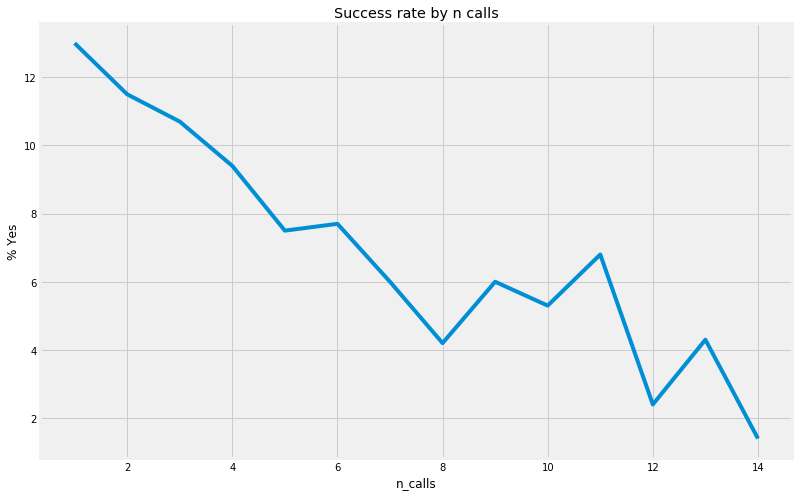

[13.0, 11.5, 10.7, 9.4, 7.5, 7.7, 6.0, 4.2, 6.0, 5.3, 6.800000000000001, 2.4, 4.3, 1.4000000000000001]


In [557]:
success_rates = []
for i in range (1, 15):
    rate = round(data_w_dummies[data_w_dummies['campaign'] == i].y_yes.mean(), 3)*100
    success_rates.append(rate)

plt.figure(figsize=(12,8))    
sns.lineplot(x=range(1, 15), y=success_rates)
plt.title('Success rate by n calls')
plt.ylabel('% Yes')
plt.xlabel('n_calls')
plt.show()

print(success_rates)

#### Model Efficiency

To estimate our model efficiency we will make a few **assumptions(** for the sake of simplicity for this exercise: 
1. In any campaign we will call all customers **at least one time**
    * by applying our model we aim to **prioritize higher potential customers with a second call**
    

2. Our **success rate** of **11%** applies to any sample of potential customers
    * our **recall** multiplied by the success rate then tells us how many **True Positives** and **False Negatives** we may expect
    * our **precision** will help us determine how many total positive predictions we may make
    

3. **False Positives** will be calls we shouldn't have made twice
4. **False Negatives** will represent missed revenue opportunities
5. **Potential Savings should exceed missed revenue due to our False Negative Rate**

As a first step, let's determine what our the **baseline revenue** we can expect is. 

In [559]:
success_rate = .11
rev_p_cust = 1650

n_y_customers = round(n_customers * success_rate, 0)

baseline_revenue = n_customers * success_rate * rev_p_cust

print(f'In a {n_customers} person campaign we can expect ${baseline_revenue} revenue' )
print(f'At a 11% success rate we can expect our campaign to yield {n_y_customers} customers')

In a 200000 person campaign we can expect $36300000.0 revenue
At a 11% success rate we can expect our campaign to yield 22000.0 customers


* If we convert 11% of potential customers, we can expect **\$36.3** million in revenue, and 22,000 customers
* We know that the baseline costs of our unoptimized campaign are between **\$1.4** and **\$2.9** million  

In [562]:
def predicted_values(n_y_customers, model, data):
    
    y_test = data['y_test']
    X_test = data['X_test']
    
    preds = model.predict(X_test)
    
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    
    est_T_positive = round(n_y_customers * recall, 0)
    est_F_negative = n_y_customers - est_T_positive
    
    total_pos = round(est_T_positive/precision, 0)
    
    return est_T_positive, est_F_negative, total_pos

In [565]:
lr_true_pos, lr_false_neg, lr_total = predicted_values(n_y_customers, 
                                                       logreg, 
                                                       drop_cats_data)

print('For a 200,000 person campaign with an assumed 11% success_rate, our LogReg model:')
print(f'\t * would predict {lr_total} total positives')
print(f'\t * of them, {lr_true_pos} would likly be successful customers')
print(f'\t * the model would likely miss up to {lr_false_neg} successful customers')

For a 200,000 person campaign with an assumed 11% success_rate, our LogReg model:
	 * would predict 52090.0 total positives
	 * of them, 14430.0 would likly be successful customers
	 * the model would likely miss up to 7570.0 successful customers


In [592]:
lr_campaign_h = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[0], 
                   cost_of_campaign(n_customers=lr_total, y_calls=1, n_calls=1)[0]])

lr_campaign_l = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[1], 
                   cost_of_campaign(n_customers=lr_total, y_calls=1, n_calls=1)[1]])

lr_campaign_h, lr_campaign_l

(1260450.0, 630225.0)

In [595]:
print(f'On the high end, the LogReg model may save us up to ${total_h_cost - lr_campaign_h}')
print(f'On the low end as much as ${total_l_cost - lr_campaign_l}')

On the high end, the LogReg model may save us up to $1629550.0
On the low end as much as $814775.0


In [601]:
lr_revenue = (lr_true_pos + (lr_false_neg * .11)) * rev_p_cust

print('Baseline Revenue: $', baseline_revenue)
print('LogReg Revenue: $', lr_revenue)
print('Difference: $', lr_revenue - baseline_revenue)

Baseline Revenue: $ 35200000.0
LogReg Revenue: $ 25183455.0
Difference: $ -10016545.0


In [593]:
rf_true_pos, rf_false_neg, rf_total = predicted_values(n_y_customers, 
                                                       forest, 
                                                       SMOTE_data)

print('For a 200,000 person campaign with an assumed 11% success_rate, our Random Forest model:')
print(f'\t * would predict {rf_total} total positives')
print(f'\t * of them, {rf_true_pos} would likly be successful customers')
print(f'\t * the model would likely miss up to {rf_false_neg} successful customers')

For a 200,000 person campaign with an assumed 11% success_rate, our Random Forest model:
	 * would predict 26305.0 total positives
	 * of them, 11644.0 would likly be successful customers
	 * the model would likely miss up to 10356.0 successful customers


In [594]:
rf_campaign_h = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[0], 
                   cost_of_campaign(n_customers=rf_total, y_calls=1, n_calls=1)[0]])

rf_campaign_l = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[1], 
                   cost_of_campaign(n_customers=rf_total, y_calls=1, n_calls=1)[1]])

rf_campaign_h, rf_campaign_l

(1131525.0, 565762.5)

In [596]:
print(f'On the high end, the Random Forest model may save us up to ${total_h_cost - rf_campaign_h}')
print(f'On the low end as much as ${total_l_cost - rf_campaign_l}')

On the high end, the Random Forest model may save us up to $1758475.0
On the low end as much as $879237.5


In [599]:
rf_revenue = (rf_true_pos + (rf_false_neg * .11 )) * rev_p_cust 

print('Baseline Revenue: $', baseline_revenue)
print('Random Forest Revenue: $', rf_revenue)
print('Difference: $', rf_revenue - baseline_revenue)

Baseline Revenue: $ 35200000.0
Random Forest Revenue: $ 21092214.0
Difference: $ -14107786.0


## Final Conclusions and Next Steps

# Graveyard

* try dropping parameters
* Try under-sampling noes 
* try SMOTE

In [ ]:
# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))

In [ ]:
# cont_vars = []
# cat_vars = []

# for col in df.columns: 
#     if df[col].dtype == 'O':
#         cat_vars.append(col)
#     else: 
#         cont_vars.append(col)

# print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
# print('----' * 8)
# print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

In [ ]:
# cat_vars.pop()
# cat_vars

In [ ]:
# for v in cat_vars:
#     print(v+':', '\n', df[v].value_counts(normalize=True), '\n')

In [ ]:
# camps = df.campaign.value_counts(normalize=True)
# camps_index = np.array(camps.index)

# cum_camps = []
# i = 0
# for v in camps: 
#     i += v
#     cum_camps.append(i)

# cum_camps = np.array(cum_camps) 


In [ ]:
# fig = plt.figure(figsize=(6,6))

# plt.plot(camps2, cum_camps)
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))
# plot = sns.catplot(x='job', kind='count', data=cat_data)

# # plot.ax gives the axis object
# # plot.ax.patches gives list of bars that can be access using index starting at 0

# for i, bar in enumerate(plot.ax.patches):
#     h = bar.get_height()
#     plot.ax.text(
#         i, # bar index (x coordinate of text)
#         h+10, # y coordinate of text
#         '{}'.format(int(h)),  # y label
#         ha='center', 
#         va='center', 
#         fontweight='bold', 
#         size=14)
# plt.show()

In [ ]:
# for col in cat_data.columns:
#     plt.figure(figsize=(6, 6))
#     fig = sns.countplot(y= cat_data[col], 
#                   data= cat_data,
#                   hue='y')
#     plt.xticks(fontsize=10, rotation=45)
#     plt.legend(fontsize=12, loc='best')
#     plt.title(col)
    
#     plt.show()

In [ ]:
# g = sns.catplot(x="poutcome", y="y", col="month",
#                 col_wrap = 5,
#                 data=test_data, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)

# (g.set_axis_labels("", "Rate")
#   .set_xticklabels(["nonexistant", "failure", "success"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True)
#   .legend(lob='best'))  

In [ ]:
# # create a function that plots the counts of uniques values for our dataframe
# def plot_cat_counts(df, hue=None):
    
#     fig = plt.figure(figsize=(15,30))
#     plt.subplots_adjust(hspace=1.3)

#     nrows = len(df.columns) //2 +1 
#     ncols = 2
    
#     for i,t in enumerate(list(df.columns)):
#         ax = fig.add_subplot(nrows, ncols, i+1)
#         sns.countplot(x= df[t], 
#                       data=df,  
#                       orient='v',
#                       ax=ax,
#                       hue=hue,
#                       palette = 'PuBuGn_d')
#         plt.title(t + '_count')
        
#         if df[t].nunique() > 3:
#             plt.xticks(rotation=45)

In [ ]:
# def add_model_results(model, data, model_name, data_name, df=model_results):
    
#     model.fit(data['X_train'], data['y_train'])
#     preds = model.predict(data['X_test'])
#     p_score = precision_score(data['y_test'], preds)
#     r_score = recall_score(data['y_test'], preds)
#     accuracy = accuracy_score(data['y_test'], preds)
#     f_score = f1_score(data['y_test'], preds)
    
#     scores = [{'model': model_name, 'data': data_name, 
#                'accuracy_score': round(accuracy, 3), 
#                'precision': round(p_score, 3),
#                'recall':round(r_score, 3),
#                'f1_score': round(f_score, 3)}]
    
#     df = model_results.append(scores, ignore_index=True)
    
#     return df